# Tutorial Outline

- [What is Numpy?](#What-is-Numpy)
- [`ndarray` object](#ndarray-object)
- [Mathematical & Logical Operation](#Mathematical-&-Logical-Operation)
- Benchmarking Performance
- [Multi-Dimensional Arrays Operations](#Multi-Dimensional-Arrays-Operations)
- [Slicing](#Slicing)
- [Filtering](#Filtering)
- [Exploring `ndarray` object](#Exploring-ndarray-object)
- [Array Creation](#Array-Creation)
- [Numpy array as an image](#Numpy-array-as-an-image)

# What is Numpy

Numpy is a fundamental library for Python which is used for scientific computing and manipulation of large arrays of data. Numpy performs mathematical, statistical and data manipulation on arrays much faster that regular Python operations. This difference is very important when you are performing large amount of calculations of arrays.

The major advantage of using Numpy for handling arrays, is that Numpy implements all the heavy lifting in C language which is much faster. This allows you to tap into the powerful C language performance from the comfort of Python.

Numpy is a part of the Scipy ecosystem of libraries which is used for mathimatics, science and engineering. This ecosystem includes:

- Scipy (Fundamental librariy for science, mathematics and engineering)
- Numpy (Multi-dimensional array for effecient math and logic operations)
- Pandas (Data analysis and DataFrame & Series objects)
- Jupyter (Web-based interactive development environment)
- Matplotlib (Charting library)
- Sympy (Symbolic computation library)


# `ndarray` object

The `ndarray` (pronounced *N D array*) object is the main object for representing your array. This object can handle multi-dimensional array of any size that your memory can store. The biggest differences between a Python `list` and a `ndarray` object are these:

- `ndarray` is a fixed size array while `list` has a dynamic size. When you reshare a `ndarray` a new object is created with the new shape and the old object is deleted from memory.
- `ndarray` allows mathematical and logical operations on complete multi-dimensional arrays. With a Python `list` you will have to iterate over the sequence which take more time and code.
- `ndarray` has homogeneous data type for the complete array while Python `list` can contain multiple data types within a single array.*

**Note**: You could have multiple data types in a single object that has multiple dimensions.

# Mathematical & Logical Operation

## Import the library

You will have to import Numpy in your code to use it. A common alias for Numpy is `np`.

In [282]:
import numpy as np

## Create arrays

We will perform a number of mathematical operations on a large list with 5 millions variables to compare Python `list` to Numpy `ndarray`

In [214]:
#%%timeit
python_list_1 = list(range(5000000))
python_list_2 = list(range(5000000))

In [215]:
#%%timeit
np_array_1 = np.arange(5000000)
np_array_2 = np.arange(5000000)

## Adding a fixed number to an array

We will define a fixed number that we will add to every item in our array. In Numpy it is very simple to do that, just add the two.

In [216]:
%%timeit
np_array_1 + 7

100 loops, best of 3: 8.37 ms per loop


In python it is much more complicated because you will have to do that manually with a loop. It is also much slower.

In [217]:
%%timeit
python_output = []
for i in python_list_1:
    python_output.append(i + 7)

1 loop, best of 3: 579 ms per loop


In [218]:
%%timeit
python_output = [i + 7 for i in python_list_1]

1 loop, best of 3: 353 ms per loop


## Adding two lists to each other

You will see the same tpattern here. In it very simple and fast to add two arrays in Numpy, just add them.

In [219]:
%%timeit
np_array_1 + np_array_2

100 loops, best of 3: 11.2 ms per loop


In [220]:
%%timeit
python_output = []
for i in range(len(python_list_1)):
    python_output.append(python_list_1[i] + python_list_2[i])

1 loop, best of 3: 972 ms per loop


In [221]:
%%timeit
python_output = [python_list_1[i] + python_list_2[i] for i in range(len(python_list_1))]

1 loop, best of 3: 711 ms per loop


## Multiplying two lists

This is pointwise product multiplication, meaning that we multiply each value in the fist array by the value of the second array. If we had two arrays $A$ and $B$. Both matricies should have the same size.

$$ C = A \circ B$$
$$ C_{ij} = A_{ij} \times B_{ij}$$

In [222]:
%%timeit
np_array_1 * np_array_2

100 loops, best of 3: 11.2 ms per loop


In [223]:
%%timeit
python_output = []
for i in range(len(python_list_1)):
    python_output.append(python_list_1[i] * python_list_2[i])

1 loop, best of 3: 994 ms per loop


In [224]:
%%timeit
python_output = [python_list_1[i] * python_list_2[i] for i in range(len(python_list_1))]

1 loop, best of 3: 723 ms per loop


## Matrix Multiplication

This is different that the previous pointwise product multiplication. If we had matrix $A$ and matrix $B$ and we wanted to multiply them the following must be true.

$A$ has size of $m,n$ *(rows, columns)* and $B$ has a size of $o,p$. To multiply:

$$A_{m,n} . B_{o,p} = C_{m,p}$$

if $n=o$ *(the inner dimension)* resulting in a matrix of the size $(m,p)$ *(the outer dimension)*.

In [225]:
A = np.random.randint(1,10,(3,1))
B = np.random.randint(1,10,(1,3))
print("A:\n==")
print(A)
print("B:\n==")
print(B)

A:
==
[[9]
 [4]
 [1]]
B:
==
[[8 9 9]]


In [226]:
C = A.dot(B)
print(C)

[[72 81 81]
 [32 36 36]
 [ 8  9  9]]


In [227]:
C = B.dot(A)
print(C)

[[117]]


## Odd or even

In [228]:
np_array_1 % 2 == 0

array([ True, False,  True, ..., False,  True, False], dtype=bool)

In [229]:
python_output = [python_list_1[i] % 2 == 0 for i in python_list_1]

# Multi-Dimensional Arrays Operations

Starting with 2D array which is 2000 * 2000 = 4M with values like this:

```
0 0 0 ... 0
1 1 1 ... 1
...
...
1998 1998 1998 ... 1998
1999 1999 1999 ... 1999
```

In [230]:
python_list_1 = [[i for l in range(2000)] for i in range(2000)]
python_list_2 = [[i for l in range(2000)] for i in range(2000)]

np_array_1 = np.array(python_list_1)
np_array_2 = np.array(python_list_2)

In [231]:
np_array_1

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ..., 
       [1997, 1997, 1997, ..., 1997, 1997, 1997],
       [1998, 1998, 1998, ..., 1998, 1998, 1998],
       [1999, 1999, 1999, ..., 1999, 1999, 1999]])

## Multiply 2D Arrays

This is pointwise product multiplication, meaning that we multiply each value in the fist array by the value of the second array. If we had two arrays $A$ and $B$. Both matricies should have the same size.

$$ C = A \circ B$$
$$ C_{ij} = A_{ij} \times B_{ij}$$

In [232]:
%%timeit
np_array_1 * np_array_2

100 loops, best of 3: 8.53 ms per loop


In [233]:
%%timeit
python_output = []
for i in range(len(python_list_1)):
    python_output.append([])
    for l in range(len(python_list_2)):
        python_output[-1:].append(python_list_1[i][l] * python_list_2[i][l])

1 loop, best of 3: 1.69 s per loop


# Indexing

## 1D Indexing

In [234]:
np_array_1 = np.array(range(5000000))

In [235]:
np_array_1[0]

0

In [236]:
np_array_1[-1]

4999999

In [237]:
np_array_1[1:10]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [238]:
np_array_1[1:10:2]

array([1, 3, 5, 7, 9])

## 2D Indexing

In [239]:
python_list_1 = [[i+l for l in range(2000)] for i in range(2000)]
np_array_1 = np.array(python_list_1)
np_array_1

array([[   0,    1,    2, ..., 1997, 1998, 1999],
       [   1,    2,    3, ..., 1998, 1999, 2000],
       [   2,    3,    4, ..., 1999, 2000, 2001],
       ..., 
       [1997, 1998, 1999, ..., 3994, 3995, 3996],
       [1998, 1999, 2000, ..., 3995, 3996, 3997],
       [1999, 2000, 2001, ..., 3996, 3997, 3998]])

In [240]:
np_array_1[2]

array([   2,    3,    4, ..., 1999, 2000, 2001])

In [241]:
np_array_1[2][0]

2

In [242]:
np_array_1[2,0]

2

In [243]:
np_array_1[1:5,0]

array([1, 2, 3, 4])

# Filtering

You find find items in a numpy array using a mask of booleans. The mask "or filter" should be the same shape as data and returns values where the mask is equal to `True`.


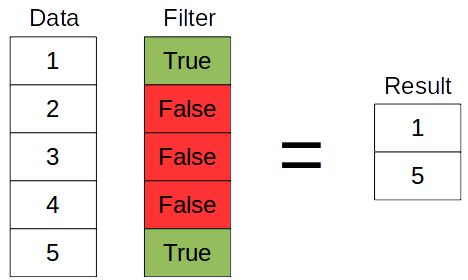

In [244]:
%%HTML
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAdQAAAEYCAYAAADlDQejAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAsTAAALEwEAmpwYAAAAB3RJTUUH4AERDCkVL9QqDAAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAACAASURBVHja7d15dBRV4vbxb3WnO/tGAiSBEAhLggiyKNsgzCg4IqKionHDwW1G0Z87oui4ISjOOI4ovDjiLiLICIqi4AqigAIiExbZEkJC9qSzp7d6/wgiYIAILU2H53NOnRO6qm7f7i766Xtv1S3DNE1ERETk2Fj8XQEREZHmQIEqIiLiAwpUERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgP+C1QzaLZrf9gGKWGYZi/WoLCPfGpfbL/fNWd7/zj3bVXFrkI8/cbJcfHYY+LxpaBb31faBICXiPv5b4ZhmGYRr9X1u7xEgpeo+CNAZcahmEap7+4freHcH+/PhFpvk6IFmpo284FaWlpW9LS0rZ06dhue0Kk21Gyc227JbOfveze0X3eatXpoq1Pf10y3AOGb56x2rJ8bNzTRuRlZZ9V0tbfr18aZ22RUJGUlJR3uKVLSlS2FX7jdF/6/EXE94L8XQFI9F4/f/1N0/qGvr//o66yrTHfvP/yeVMfevLvH+1amDb+zP99kLX42zHPndvy7d/+BXoQV57t29Wlffz9yuVwEr03L95+zcHHxaFZSPrL13Nrr/QuwGI3QyzUc6gfYPr8ReR3cEK0UBtji+1cPuTaKbMXZa7p+48/hi2A7dbpl//1+ffyPWnHWrZZmRn5+Va6+vs1io9Z7N6QkJC6ELul/nCbHZfP33RbamtcYabPelVE5ER3wgbqz4zI3hV3zHnt5lFRZFHxXuyE5zP/rx6s+zZwFdpXzLzj2gtPT/k22mo4G8bWwr1JPc7deMvzy+4pOGD8tcLy0Xn2WZa4UUWfuEigal7M0CgjxzDCvRcvrbz2t5cnJ47GxlAPVmEc8fMHwGOUfv/6afePHvhmx1hbUcMxEGYmnXZe5m0zvr6z0L1/2b88b8QlSz4u2PifbmN6xn1jWGyehOu/fqd6/2NVRJq1E6DL98isrc8veOivKS++93T25O1vvT1880M9Yk4LpgTPHtu71/b61+i3C26BKDN98PmrhiWE7nYVboxb/uUng2bc9snT//12/pk/vH5xRoKVWgg2O46+d/Gt0R+GvjhnfYaTFO+FN1/0evvgqPLT29v/99vLk8ByhM8fAJeR9fpVlwy4dt6b+RAc0+1PW0eNSP40uCwz8ouPFg97/pbFz7z14czzV82/6ZLOwZSDgT08uBagtnBNy6mjH5j5xs4OvXoPPGVVQpeojSf8L1YR8R3TNP2yeAvfaj0QSiHRc+uqmguOtH3V8rH948AJ/etfzfOcapomNatv790GauEU10OrK871mqbRsL3XqFo7qUdPcECK+961tefuX1btuvE9UqCGiNFln1aYbX9+/GjL0+K/4+KXxWPkzjojAzDp+/LaPI8ZapoeI//1/pcCJn1mrs9xm+GH+/xN08S59d8d+1kohRjvyJmZ91V7zaCf19VnzWl3VQIbwWL2fXbrY07TtJimSdl7fxwOmNhaOxPPnLLi+wpvgr/fRy1atBz/JWB+QAcnnlqUCHVQZN1e4moFYGlzed6MOa+NmTXnlatv7x35pbHvZCXDDD/tL5vGnc5XkG39bFVhv6acIezr8iTQ1FjW/GvKtau8xAYPe2HFzBtOeS7MwP3zWnvK6Jxnnht+Xyhe7+pnXxqTWUcLAMNiMQ0Al92S8cztk/tEGvn+fiUicvwFRJcvgGEPc9nBCy7qXKYdIDhpQP7IywfMa9jCNJyVxREFReUta92mDSotrr2jV9XF1TEeMI50drCvy5NjsccyfVi72XNDLNWH3ibM7Pv08qcWjGn7rE8GKut3BC9ekn8WQK+rz/qgtYW6AzewmPGDr/q+N4sdK7KWJq0seiK5Z7K1eN/q6EGOkemhP/j7nRMR/wiYQPVUFYdVQxCEmbFh1qqGR02j8n+z0yZNfPrRVz9cf0Ghh5DG9jXNprYmfV2eHAtvRXF4YcXhJ2PIcbhb7D2T9th/3DjzgzP3NFyXuu3FmzMyFtlO/9U27gLbdgiDXOv63PoUksPW7VvXKq2slZ0af79vIuIfAROoNdtXt8uGUOwptae0suWBaVSteey0IX0f+XKdl+iQrhdsH3fZ4He6tm2ZHRtuqzKoMb5/7IZxz2xmQNOewdflybFJ9N66avuopl+H6oMfOWa9Ue0kGKB4xYJe86DXoTeuMUurvREHPGQLddsNvH57y0TErwIjUM1y66o3l42sAwvdL9jeM5JCPDm2t2979OF1XqLDz335qw0Lx17QwU7FLzuVWYJfvHHEM5vNpgWgr8uTwGMJ8UaFUIsrysz4PPfqt/8UMdvfVRKRwBEQJyU5f5rVceJcxzUQxJBxF8xuG0Q1NT+FffKj2QsizRF3XzrrwPAD6rJDVmeZHZv8JL4uTwKPvU19jyRyoMLYubMixasTz0TkNzjhA9Vd8HHr8aPueXWNSTSd7tzx9GVtX204GciD24sFQs2Y8J/HVH/mNUq+eGbArCx6Apim2fgXo+k1fpnJxgflSWA54PMH7Cn1w4Ylfgmw5rVPLszzNDKJR82W8IWzPxq9Lq+2vWZBEpH9nbCB6q3eFf7Nq3ddOazb8NX/3sQA7ANrn3z34RtOD6cQgOCUun4p7IBCy5L//jiiysTWsKfHKPnm6dMv/8unM1PSgncCFG8rbOfc77VabKFuG5hUZ4VtK/O0PNbyJLA0+vkDEGr2vO3uN/sYONzLbu97w/Qf7qrcdxwA9Vkh827786SLrhoxt+8Vb76T49bda0RkP/66APaXC/gxQ9t2zk9LS9uclpa2Oa1L5y3tE2Nyg8BLw5mbptExI3v6DxVn/jLRgolpuoxdr547OgzcYDU7nHXFiutvuGbWhQPbLQvC6j3twRXTNr408JqGa0nbuYeN+b+3n11XPcQ0TcyyxS1GR7IDMGnds+TMMwctv/i5zPu3v3ru5UdVnpbf4bj4/SZ2aPzz33x/vWlaTLPe2P7qZaMbrnnGDO98ZtbIy6589/IL/7jglBgKAJO4C4r/s7XujJ+fu3zhWecaYHLKU5t/cprR/n4PtWjR4p/Fb0+8f6A2tgTHppSfPuLGTx59/Zvr99Tv/SI8ePE4rOte/NtVf0yN3NSwn91s3WNk5r1v/e+GCq9p8zpWR0/5c9u5VjCxd6678cuK0Q37Oo1d7447r288OYBJcNu686Zvvd/pcdiOrjwtvj8ufsdAPdTnv3fmI9N0G6Vr3+g+YfTAN1JjgooajgXDjGx3+u5Rd7/03LeFrnb7P7cCVYsWLaZpYpim5iYQERE5VhoHFBER8QEFqoiIiA8oUEVERHxAgSoiIuIDClQREREfUKCKiIj4gAJVRETEBxSoIiIiPqBAFRER8YEm3Q+1oqLiohtuuGGavyvb3Hi9Xs8555wz+aabbnrR33U5GlW1ZQl/vfOqz3J25kf5uy7NTdeOvb789zMv3BgSElLn77qISNM0aerBGTNmvP3kk09m/OMf//B3fZsVh8NRe+ONN4aaAXo7uE1b1/c/pUvPb6//+xB/V6XZmfXYVyxfvvzMQYMGfe3vuohI0zSphQowYsQIRo8e7e/6NisOh8N1zz33OP1dj2MR2yqcXkNS/F2NZqdv/z4/+rsOIvLbaAxVRETEBxSoIiIiPqBAFRER8QEFqoiIiA8oUEVERHxAgSoiIuIDClQREREfUKCKiIj4gAJVRETEBxSoIiIiPqBAFRER8QEFqoiIiA8oUEVERHygyXebOeE5d7P4sau58omvKCeViT9uZFL3YH/XSprMS+GcD3jsP47fuF8Mo14/n7Pb6LehiPhXMwhUk9qt8xifcS3Pr9W9mAOXgTUygvg4F64DHvdQU1Lf8FhwCNERBwVncARhQQF5O1kRaWYCPFCd7HjjJoZf+xo/mTH88Y5bqHruGb73+rte8tsZxI04m0dGHPSwu4JPb1rAgmxIum44910aidXfVRURaURg95OZlXz/4mv8FDuUxz/fwtJHh9IqwH8iiA+ZJq56L6a/6yEiJ4XAjh/DRvIlz7Psvb9xZrwVKvxdIfEPE8fixUz8RzH2M4fy6Nhq3ntiLau31xPyp3N44sFWVL67iEdmlMOpg3nq2faEGwfuX/LeIh5+vqyR9SY1W3bw6ZyfWLu2mOIqE7ASnZpAz5HdOXdEKyLVZBYRAj1QiWLAHeP8XQnxOwNraENni6ushKWPrmN1fgTJ3aKJamvj6EdYvZQsWc4/n8qmAghtn8Bp/cIJqirnp1W5fPXvXL5b1Z97H+lCS5u/3wMR8bcAD1SRBlZbQ6Camzexpmtvxj9/Ku3Cfl57dIPqntwtvDI1mwrsdL9zOGNHRGPfm86egizevHUZ361cxasfJHLXxRrbFTnZBfYYqsjPDBpaom4rfW7uul+YHi03u+b/jywTgvr0I2O/MAWwtk7h4lvbYMMke/5W9jj9/QaIiL8pUKV5CW/Fqe180FZ0VbHx+1oAkocmEPWrfmODiB4dSAbIzyPLoVOfRE526vKV5iUmikhfjGe6atlT0vBn0YcreXllI789PXUUA1DD7iIPtNR/J5GTmb4BpHkJCvLRQe3B6W74q+p/Oaw7wrY1mlNE5KSnQBUBzIN7bA0rIXbAbaPPP0cztqf+q4jI4WkMVU4CBhh7B0FNs5GJHrzUFR90VpEtjDZxAC5K9jg1OYSIHJECVU4K9p9nX6ippc5z0EpPDdvWVB/4WFAE6X1CAdi1JA9HY1fe1Ffw42e57C7xKHBFRIEqJwOD0HbxRANkZbO5ZP/481L6xRoWb/vlkYa1VtqO6kY7A7w/fsdbC0up2383VxXrpi3lxcmfMXXSDso9TaiGiDRrAT0w5NwyjUtGv8DWn3vrPI69f+/g3+d35929s+dg78y4efO5Lc3u7yqLn9g6pjGk02be31bEnNuWkjM8iVZhHkozs/j2uyAGj23F568U4t2vS9jaNp3rxhfzr6ey2PT8Ih54rxVpncOxuWrJW59PfhUQlUzGPanEalYHkZNeQAeqt3Y3GzZsIbuRdVW7trJl37/q2F2rW9Cc1GzRDH3qHCzT1/LVinxWvJkP1mAS+6Ry2bTTOK1iJV8DdW43HpO9s0RYiD/nTCamtuXT2VtYu6aIDV8WAhDSKo7ThqcxNKMjHWJ0+zgRCfBADen5FFnmU/6uhvyegqIY+vIYhh5hs9CB5zDts8NvY4lJYOgD5x2irMH847PBjTxuENYplQv+nsoF/n4vROSEpjFUERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgPKFBFRER8QIEqInISM4tmt/6DYZQahmEeerGbsR1O3zXir0+/vGhbTQ9z79QnJz6vUfDGgEsNwzCN019cv9tD+O/5bApUEREBILRt54K0tLQt+y9dOnfYlhTlLi/PWpP80Yvjx47s3HPNze/nj/EETKg2ptqyfGzc00bkZWWfVdLWV6UqUEVEBEj0Xj9//U2bN29O33/Z8tOOzrkOZ4uyDXNPueuM4M9ha9DMK2947t18T7q/a3zUXHm2b1eX9vF1sQpUERE5giAz5tTRm55+/5Wrzw0lj+oPo579KP+iQG2lmpWZkZ9vpauvy1WgiohIk1haDS6+pBtrALLX7j7FeUCGeIzS718/7f7RA9/sGGsrahh7DTOTTjsv87YZX99Z6Cb01yV6jYoNb3d9MGPQa11ahuT/PGYbHN+5bFDGxPmzf6zo790X2i5j+zPdbzQMwzTOnLu6xCT4wLLcRta0nmMPvR6gwvjoPPssS9yook9cJFA1L2ZolJFjGOHei5dWXnus709AT44vIiLHkddt1LuxAdhCbfW/NE9dRtbrV10y4Np5b+ZDcEy3P20dNSL50+CyzMgvPlo87PlbFj/z1oczz181/6ZLOgdT3rCPaVSunNhn4IAnv8iEiKj0wTtGntVmfrir1Ni57qseK96ZfPGKdxZc8OM33148ZUDUIt80hYPNjqPvXXxr9IehL85Zn+EkxXvhzRe93j44qvz09vb/HWvpClQREWkS9+7FSbM3cAaE0H1Q+++CwQvg2jYjNWPsvBfzibGPnLliwpwbT/lnmIEbwJn9Trvr+md8/NaHN5919f87666vb+/0iA28mEWWjx78552ZEJH+9++f/+6RPndFGLgAMCuta58+928D7vtm2tR75j48btkNnydbqTn2VxBM2tgn3n26l/unD+asvyg7om/9bU89+/ezI9nti/enSYHatm3bmpdeeomzzz7b2ZTtpWmcTmeIw+EI2Lueh9WaZv/6IOZf/qGOCx/bUlbew2Kx6Ca+coLwGhUb53Z5IOPWWd94iKPt9bvvOyt2kQEm1FjW/GvKtau8xAYPe+HrmTec8tzPYQpgTxmd88xzr93338sWL1j97EtjMv/65HM9QyjGVWTfvMvVDqLMnkPSVu4LUwAj0tP7jnkvLTtj54bgdmn5rSzU+fsdaIomBeru3bvDiouLmTBhQsB++Z+ISktLnV9//bW/q3HUDJfHWOxwMDc1VceFj11WXILX69U5DnIc7bG8clmfGV9EWCYf8LDpslQXZcVlFTlbARAzrPyfi568ZlCkkQdA/Y7gxUvyzwLodfVZH7T+VfhZzPjBV33fm8WOFVlLk1YWPZHcM9lajK21s3unkO1srRj07l0TH7zozUe3XnpqzHdWMAGwJ9X3+1PSsv0KOuFPgGpyl++IESMYPXq0v+vbrDgcjrr77ruv1t/1OBbt7HZGx8b6uxrNzqBevX70dx3k5FOdvSkpE5IaXdnizLLr7xo37dabL53Zs4U1b9/jzvzgzD0N13Jue/HmjIxFttN/ta+7wLYdwiDXuj63PoXksHUY8Z7zpz3/2IX9bxi0cP1z6Rndn1sVmtIvd9ifz1ly7vCRiy/48+mftAk1Kvz9nvwWGkMVEREg0Xvrqu2jpvUNff+XxzxG7lsXjEq7+qO51bWhtj9cc8l7B4QpgFlvVDsbzqgtXrGg1zzodejnqDFLq70RP//L3vH6HfN/6n3GO/96+ubpby64dsXOVV3ef3HV2PdffHzsLZYU97nj//XCCw+Pejg1BIe/352mUJeSiIgcgtVsc9m0D6cOsn1A7ZKI/7vlnWdyPYQdsIklxBsVQi1EmRmfV15lmqZx6KXC8s7ZEW8e8AyxvcqufGz25K93VKVX7vq+7aKXHv/L34anvR/izbZ8/OTFtw/460evFHsJaUptvV7Tr5mmQBURkUOzpdZfP/OxB3pCRdWHt/zxtvl7/nLAhA72NvU9ksiBCmPnzooU71GPdVrMiOQ+uSOuf/C1GR9lXrTro+vPSYT6wjeePO/jQm9HMDAsRsP4qtdj/PqMPTcVeY6W/nyrFKgiInJYwafctuU/93WaAhXGe3+747H3C72d9620p9QPG5b4JcCa1z65MO/gFixAzZbwhbM/Gr0ur7b9zxPre0rXxy565Zlrnn5ry5g6sB64g9VsOeiyNf1CKcQstuZWeGLAQlhsWMOYasWe8Ar3QRM3uPPsy5ZmD/lNL8z0Gr6c6F+BKiIiRxDu7XP/f2b+LYkfKZsbd9Pdi6f+0g0bava87e43+xg43Mtu73vD9B/uqjQbJn8AoD4rZN5tf5500VUj5va94s13ctwNd3zxln3V4pHr7p42/torX5y8vGTEgdMYuo3cJa8OWl5LAjE9HX0SbLvAYkZ3PWN7EtSz8d3UpXnuX0Idp5E9557zH1vH2Q3/NveeKtw4iy3UbQOT6qywbWUen7VqFagiInJERvTg8sdnXnFPC3AVv3n9yPs+Lb3k5+5de5fbts195bIbE6l0fvJ/vR5LTBu89YLLr3o346I/LeiW0CH7spez7yDugpIZs8bc2i6IKgBb6tisFx7s+YTFszb48cHxC5N6/HHjyEsz/psxeuS8P/VIWtv20rc/KKFF0IXPTnliSBS5AKGn3bzx1p4sx/tt8M0D//zRTQ899dQ/n350/P+N6jX3lBtzXrnu8T/8ywo/dwkfsuVpb9M/v1ckBbDGdnPf05cOHnzm8kumbbnfeYyZqEAVEZEmsJjxw//x5bQR4bOhwPLydROf+qrcTG5YZzdTr539bubaN86YMHrgm62Lvg3/YO7sS95Z+NWFOVGnu0bd/dK0bzfN731Dp+Dv9hVnRHr6Pfb1PzcteGL42KHdP7LtXJa4aP47o955d9GlX++OSD3jojs/nLli0znzrk35t23vjEwEn1J77ydfXDX1qn7/SXZ8HvyfSRPG3/PA8098Xj8s5oVvPx0+cUCbj8LAg7PG5vIeJt9izi775yvjbu0bz24KfmixfHXWGXVB1mPu+zVM0zziRjNmzHh7w4YNGdOnT/f3J9qsOByOipSUFLO8vDzG33U5GrvWrOl/5sCB32Z37+7vqjQ7Z3q9P0557rlxgwYNCtyZP0ROMmqhioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgPNIPJ8b041r/N1CdeYM6S1exweIBQWncbyIgxd/Hg/w2nQ8gJf9efk5LpLmXQ+p1809QdwjtQkN6CVkf5fAUlm0nIqoawFHLS42mrw0JEfCjAA9XJzjeuYdCYueQBGDEkp7clrGIbWzI/4+X7PuON+Y+x4tMHOSNS354nMmuQjdZH+Igigq0Hz08mInLCCOhAdW37f1w5di55WOhx5wLen3w+KSEG4CL/i8e58M+Ps3r13xk77VLWPtAV3QX7RGXj5k6nMi1cIxAiErgCOFDr2fjys6z0AN2nMPfJkaTsS0wbCX+ayEv3zabHpO1kvvUB2fd2pbPtGJ5ORCRArFy58qUFCxZ083c9mpuYmJh1EyZMuOVQ6wM4UA2i+t7Gw+N3Y+l/Bam/an4GkzIwDTvbcZZmU+oCFKjNi+lmRfEephaX82WNk4bbUFhIDI3govhEHm4ZccRuZICK2lKm7ilibmU1W90NM4fZg4I5IzKWWxITyAi1HnT2nklpTSlP5xcxt6KGHR5z7/NGcknLBB6Kj6CVRhjEjwYMGHD9/fffT3R0tL+r0qxMmDChf3R09Iabb755RmPrAzhQ7XS46E4euehQ671U5ZfgBIhPJU5h2ryYLt7N2sToUhdgJT0immE2Cy53HcsrK5iRU8F/qzvyQ/sYEg4TbpXVuQzcnE8mEBUSwchIO+Gmm501Vawoy2dFWTk/pqczJfzneT5Nskp2MiCrjHwgJjSSUaF2gj21fOFw8PwuB285UljVMZ7OClXxk+joaPO+++4zFKi+lZ2dvexw6wM4UI/AuZW3pq0CoMeYkaQoUJuV2pp87ih1ASE8lJ7Oo+G/TGxdXbOHQZvy+KE0h2daRzE17FBjs24+yi0gE0hP7Mp3SWFE7FvnYW3+NgbkVjF1dxnjusSTbICrvoiMrDLysTIyJZ058SH7bv7odJZx3eYdvOXI5uqiSL5uFaxOEZGTSPM8C8SsZPXkDCasA1JuZdpfO+uLrZmx2FswI7U9s1Lbc3vYgXeJCA+LZ1wYgJPPqt14DlWI6WKz0wSs9IwM2S9MAaz0bp3Ksi5prG0fs7cL18uagnxWAcFR7Zi5X5gC2O2xPJMcTSiwuqCYTK+/3yUROZ6aXwvVW863Uy5g6KM/4A0exNT3n+LMKPW9ndhcTN+6gbmH/Zgs9G2bxoI4O1Yg2BbOyNjwfWudHjcFbg+1pgl4ce0tq9rtxQONX25j2OgeYoF6D+/m5HJRhyQuDd3v0hzDRr/I/X6KmfUsrnAB0KtFJK0bKTI+ogW9cbDCWcFKdxI97Tr2RE4WzStQ67bz1s1/5upXt0P0MP7x+Xzu6hF2zPe4k9+f1+Om8Ajb5Hhg/5sNVtaWMikvn1cdtRQe4i6Eh785YRDnJydzYXU2C2sLydhYSKg9nGFRUZwbHc0FUeG02b8Px+sisyFP2Va8iwxHI0eW6WI7AC7Wu0xQoIqcNJpNoHpLlzPpouE8vLwaUv/CW0tmcGXHEH9XS5rExq3pv+061KqaPQzZlMc6ICQkhnGxEXS1BxFrMTDw8v2ebJ6pO3I59uB45p8axjsFBUwvLWdFfTXvF1fzfvEebsHOuQnJvJAYQ6oFwKR6b0IXV5Uz77AleylVl6/ISaVZBKp7zwfcNvgC/t82iDprCh+/O54Bsc1zeFgA08nbuxrCNDyqPRs6xdHhgIagh+DipgUqgNUaxpVJHbgyCaqcNXxV4WBReSmvOur4OH87A1ydyGwfTbxhIcoCeKxkdOnB25E6xkTkFwH/jeAtX87EoQ1h2vaqN/nhowkK0+bOW8cntQBWRrSOOShMAW89q+uPrugIexgj4hOZ0ekUdnWKJxEoLMnnYxdg2OhhA/Cws96DGqAisr/ATh5PPu/99UKmboTYUa+z/OWr6BDs70rJ8eAGwCDG+usxypLKQmY5G/4+3Biqx13LopICni6t49eNWYOWEbH0szQ8W67HBMPOsKiGk5TWlFSQ11jh3joWljpY5/IeYfxWRJqbAA5Uk9Ild3PT3DJodR1zXrqK9pqs9+RgsdPPDuBmSVktVftWmJRU5XN5VsXeOZ2huN6F8xDFeD2VPJK1m/FZO5lcdfDlNSa5FSUs9wLWMPrYDMBCz5at6QO4q3K4oaiGygN2cTIvZysX7dxG3x2l5ChRRU4qgTuG6slh3qOzKQUo/5hxA0859J1Igk/h7vfe4cZUXY3aLBjBXJ0QxaSsCrIKttCjJpazgg2K6yr5sMpFt8QuvG3PpVt2FWUlWVxMDCNatSHjoGJswXG8kFjCwD01PL5lPTNDI+kbEkQ4Xgrqqvmy1g0EcWFyG4bsPbjsIa2Y276aQVllfJKzicTCCM4KsxNmuthQWclGDxAUw4z2cbTTCb4iJ5UADtQaisv3/u3MY9uWw23sZU+dmgvNh0FyXCorzFzuzC/ly8pSZlUatA6N4s4OnXioRSgRnrZMLtvBgxVOlpY6aB+X1Eg5VvolpbEp+DfG2gAAHb5JREFUrJAni0pZUlXJotqGNUHWYM6IieOG1gmMjQjab2IQg9S4DmSGxjA1v4i5FdV8UNbQRo60hzEqviXjE+LoH6Q0FTnZBG6g2tOZuNlkor/rIUfNCGrBij4tjnJvKz3j2/FFfLtDrA5nQufuTDjgwXTMuIM3tNAlJoGXYxJ+S82JDWvBlNQWTPHTeyciJ54AHkMVERE5cShQRUTk+HPuZvGDfyTWMDCMjjy44SivdTuBBG6Xr4iIBCCT2q3zGJ9xLc+vbeLsKwFCLVQRETlOnOx4Yyw90y7n+bUh/PGOuzi9GaVQM3opIiJyQjMr+f7F1/gpdiiPf76FpY8OpVUz6idtRi9FREROaIaN5EueZ9l7f+PMeCtU+LtCvqVAFRGR4ySKAXeM83clfjfq8hUREfEBBaqIiIgPKFBFRER8QIEqIiLiAwpUERERH1CgioiI+IACVURExAeadB1qu3btaqdPn07//v09/q5wc+J0OsMdDof12EvyD6vFYnYLDaX/1q06LnxsU3V1D4vF4vV3PUSk6ZoUqLt27Qo1DINJkyYF7Jf/iai0tLT+8ssvD9j31OP1GosdDpZ27hywr+FEdWFOTr3X61UPkkgAafJMSYMGDWLo0KH+rm+z4nA46qOjowP6dgvt7HaGRkX5uxrNTu+uXbf4uw4ivubcMo1LRr/AVufeBzyOvX/v4N/nd+fd0L2/Ie2dGTdvPrel2f1d5d9EUw+KiMhx4a3dzYYNW8huZF3Vrq388iuyjt21gTfioUAVEZHjIqTnU2SZT/m7Gr8bjdGIiIj4gAJVRETEBxSoIiIiPqBAFRER8QEFqoiIiA/oLF8R+V158uYlXX/JE2/8UEucv+tysJDu4zfNe+XKG5ODqPJ3XSTwKVBF5Hdl1ucFr1u5/owfIdLfdfkV1+6QOhPN9CU+oS5fERERH1CgioiI+IACVURExAcUqCIiIj4Q+CclmXXs+nQGU/71Oh8s+4HcaoBQEk8dxIgxd3D/rcNJDTX8XUtphOkuZdD6nXzT1B3CO1CQ3oJWR/l8BSWbSciqhrAUctLjaavD4rgI6nD7zvXm7bolkTR7gR2o3lK+emAoQ59ahxsgKoWuPSJxF25l6/+W8tL4pbz6zkMs/+xR+kfr2/NEZg2y0foIH1FEsFWnY4rICSuAA9WkdMntXPLUOtykcM2rH/LCNd2ItAA42fPZ41w4fBLfrXmcvzx7Oesf7kawv6ssh2Dj5k6nMi1cIxAiErgCN1DNUr58di4lQOIts5l+bTci9q20k3j2g7x072xOm7yDLfOXkjuxG6mB+2pFRJps9OjRxk033VQVFBQUeDcVPYF9/fXXg7t37z7nUOsDOGIiGPjUUj4ZV05I79P3C9OfBdO2V1tgB9SUUuMJ7FcrjTDdrCjew9Ticr6scVIBgIXE0Aguik/k4ZYRR+xGBqioLWXqniLmVlaz1W0CYA8K5ozIWG5JTCAj1HrQ2XsmpTWlPJ1fxNyKGnZ4zL3PG8klLRN4KD6CVhphED966aWXuP/++yOio6P9XZVmZfbs2YddH7gRYwSTcNpgEk471AZVbPpiGwDh3fvRxu7vCotPmS7ezdrE6FIXYCU9IpphNgsudx3LKyuYkVPBf6s78kP7GBIOE26V1bkM3JxPJhAVEsHISDvhppudNVWsKMtnRVk5P6anMyXcSkMxJlklOxmQVUY+EBMayahQO8GeWr5wOHh+l4O3HCms6hhPZ4Wq+El0dLR53333GQpU38rOzl52uPWBG6iH4ancztJpt3HN9DywDeDhSWcTqy+3ZqW2Jp87Sl1ACA+lp/PovsCD6po9DNqUxw+lOTzTOoqpYYcam3XzUW4BmUB6Yle+Swrbr6fDw9r8bQzIrWLq7jLGdYkn2QBXfREZWWXkY2VkSjpz4kMI27uH01nGdZt38JYjm6uLIvm6VTA2f79RInLcNJuzQFw7X+S8jkm0jgkhKKoTwyeuJvHCCcxZv4R7uoX4u3riYxZ7C2aktmdWantuD/slTAHCw+IZFwbg5LNqN55DFWK62Ow0ASs9I0MOGjaw0rt1Ksu6pLG2fczeLlwvawryWQUER7Vj5n5hCmC3x/JMcjShwOqCYjI1eiVyUmk2LVTTWcLOHXso/PkBq4Grsojdu8twdo3QGb4nNBfTt25g7mF7ESz0bZvGgjg7ViDYFs7I2PB9a50eNwVuD7WmCXhx7S2r2u3FA41fbmPY6B5igXoP7+bkclGHJC4N3e/SHMNGv8j92phmPYsrXAD0ahFJ60aKjI9oQW8crHBWsNKdRE+7ukZEThbNJlDtafezybwfr7OSwh3r+Oytp7l/0izu+XwuS6av4f2bOytUT2Bej/uXH0OHkOMBc79/V9aWMikvn1cdtRSaje9jHrbEIM5PTubC6mwW1haSsbGQUHs4w6KiODc6mguiwmmzfx+O10VmQ56yrXgXGY5GwtJ0sR0AF+tdJihQRU4azSZQf2axR5KQPpirHv8DZ/W4nFMum8+Se+7mo9ELGRWvL7cTk41b03/bdahVNXsYsimPdUBISAzjYiPoag8i1mJg4OX7Pdk8U3fkcuzB8cw/NYx3CgqYXlrOivpq3i+u5v3iPdyCnXMTknkhMYZUC4BJ9d6ELq4qZ95hS/ZSqi5fkZNKswvUX1hJPPdmhkXOZ17lChZurGHU4PBjL1b8z3Ty9q6GMA2Pas+GTnF0OOC3kofg4qYFKoDVGsaVSR24MgmqnDV8VeFgUXkprzrq+Dh/OwNcnchsH028YSHKAnisZHTpwduRzeYUBBHxgcD9RqhcxeOXDWPQwFE8t9nZ+DYGe09WcVLtVHOh2fDW8UktgJURrWMOClPAW8/q+qMrOsIexoj4RGZ0OoVdneJJBApL8vnYBRg2etgAPOys96AjSkT2F7iBagum+rtPWfHtAp57cxONNUZqNy9mZSVAMn2SdaZvc+IGwCDG+utu/JLKQmbt/Y11uDFUj7uWRSUFPF1a18jxY9AyIpZ+loZny/WYYNgZFtVwktKakgryGivcW8fCUgfrXN4jjN+KSHMTuF2+Id244fYzmHrnd2x/YhR/6/I+z119akOXHF4qN77NnRn/ZBdgnH4Tl6bqisBmw2Knnx0W1rlZUlZLVXj43kteTEqqCrg8q4KUEIPiOpPiehdOQmhsXg+vp5JHsnazxiil0t6ZhyOC9jsb2CS3ooTlXsAaRh+bARj0bNmaPoW7WVOVww1FocxrFUbkvl2czMvZymXFToIiUtjeJZ52GrbHk/dO0rUXPv72D7XE+bsuBwvpPmHje29cfV1yEFX+rosEvsANVGx0umUOL389kLHzd/Latd15bVwyXVNjoXwnm3ZVNmwWO4Lpb/6NTsrT5sMI5uqEKCZlVZBVsIUeNbGcFWxQXFfJh1UuuiV24W17Lt2yqygryeJiYhjRqg0ZBxVjC47jhcQSBu6p4fEt65kZGknfkCDC8VJQV82XtW4giAuT2zBkb9LaQ1oxt301g7LK+CRnE4mFEZwVZifMdLGhspKNHiAohhnt4xSme5n1+cEbvs/slckvvz1OGGZeUJ2pmxiJbwRuly+APZW/zN3CD7MfJOMPnWhRn8OmH39k0y4n8V3+wOh7Z7HypwX8LU3dvc2LQXJcKitSWvLHYAs7K0uZVVzKSk8od3boyvKkCNJj2zI5yo4VJ0tLHWR6GuuAtdIvKY1NHdswNioUW30li8rKeKfMwddOK2fEtGZmWjfmxdn3m/HIIDWuA5ldOzAhNoLW7mo+KCvlnfJKcqxhjGqdwrfdUrkhWGkqcrIJ4BbqXpZoTrvicd6+4nF/10R+IyOoBSv6tDjKva30jG/HF/HtDrE6nAmduzPhgAfTMX/V6WihS0wCL8ck/JaaExvWgimpLZjip/dORE48gd1CFREROUEoUEVE5Lgwi2bzB8PAOMIy4I2CgLwsLfC7fEXkhBbU4fad683bo/xdD/E/T1Xx3tOp7SR16kBko6eDhZMeF0QgnoWgQBURkePCU1VENUDr65i/fgb9w461xBOLunxFROS42NdCjYgnvBlerKRAFRGR48JTXdQQqOHxRChQRUREjo67soQagPDm2ULVGKqIiBwHHqqLqzABW3QY5d/N5qU3FvHNpjyqjEgS0/oz/MrryBiY2OhUoYFAgSoiIseBh6qihnN8XUuuJO3jg25J8eki5rzwII+OeYMlL15Nx2B/1/e3U5eviIgcBw0tVAC8kZx110t8vqWYWlcdZTu/ZfYDw2gJ7Hj9Gs59cHXD2cABRi1UERE5DkLoes9SfvyLE2tsKunJEftadCHt+3PFE4s4vdUQut6xkm3/foCFdy/hyoTAavMFVm1FRCRAGYQlpdO9Rw9O2S9Mf2Gn0zX38+cQwLWahZk1/q7wb6ZAFRGRE4IRmkinFgBVFFW5/V2d30yBKiIix4e3jrI9uZQ5D7G+voisMoBokqIDb0SySTVOTk6u+de//kX//v09/q5wc+J0OsMrKioC9keN1TC87e12+m/dquPCxzKrq3tYrVa9r9J8VK/gpo6D+E9BMEPf2MHHVycddGd3LwWfzuTzWsDWmxFdA29ewiYFak5OTlhISAiTJk1qhpfi+k9paWn95ZdfHoAnhzfwmKZlWVUVSzt31nHhYxfm5NR7PB69r9J8hPfk+iva8Z9nd/HpTRlMSprD/Wcl7b3mtJ7dS6dwxbXvUwUkXf93RrQKvLZGk9vUgwYNYujQof6ub7PicDjqo6Oj6469JP9pZ7czNEo3EvG13l27bvF3HUR8K5y+j87j8dVDeOib5TxydhsmJ6bTLSmEmt2ZbClwARD5p6f4YOpgogLwdjOB9xNAREQCkhHVlwe/2MGXL9zG+b2TCS7YzLo1P7ClMJSUM0Zx90vfsn3JeHpHBmCaoutQRUTkeLInMuSW5xhyy3P+ronPqYUqIiLiAwpUERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgPKFBFRER8QIEqIiLiAwpUERERH1CgioiI+EAznMvXpPyLcXQ/awa7MThrYRmfXRDt70pJI0x3KYPW7+Sbpu4Q3oGC9Ba0OsrnKyjZTEJWNYSlkJMeT9vAnH9bRE5QzS5QzfIveWDMDHb7uyLym1iDbLQ+QsBFBFvRDUJF5ETVvALVLOfLB8YwYzdEAFX+ro80kY2bO53KtHCNQIhI4GpGgWpS/uUDjJmxG0vfv/NQ0GPc1+S+RBGR5sPhcBj333//yqioqHp/16U5mTFjxpBZs2a9dqj1zSZQzfKvmHjtDHYbvZny8t/oPO4xf1dJfm+mmxXFe5haXM6XNU4qALCQGBrBRfGJPNwy4ojdyAAVtaVM3VPE3MpqtrpNAOxBwZwRGcstiQlkhFoPOnvPpLSmlKfzi5hbUcMOj7n3eSO5pGUCD8VH0Erjs+JHa9eu7b1kyZJz/F2P5mb69OnvXHfddS8fan3zCFSznK8mjmF6jkGvya9xR7dQFvu7TvL7Ml28m7WJ0aUuwEp6RDTDbBZc7jqWV1YwI6eC/1Z35If2MSQcJtwqq3MZuDmfTCAqJIKRkXbCTTc7a6pYUZbPirJyfkxPZ0q4lYZiTLJKdjIgq4x8ICY0klGhdoI9tXzhcPD8LgdvOVJY1TGezgpV8ZNevXqt69Wr1zp/1+Nk0wwC1aT8q4mMmZ6D0Wsyr995KiGU+7tS8jurrcnnjlIXEMJD6ek8ui/woLpmD4M25fFDaQ7PtI5iatihxmbdfJRbQCaQntiV75LCiNi3zsPa/G0MyK1i6u4yxnWJJ9kAV30RGVll5GNlZEo6c+JDCNu7h9NZxnWbd/CWI5uriyL5ulUwNn+/USJy3AT8WSCm4ysmjplOjtGLJ16/k1ND/F0jOR4s9hbMSG3PrNT23B72S5gChIfFMy4MwMln1W48hyrEdLHZaQJWekaG7BemAFZ6t05lWZc01raP2duF62VNQT6rgOCodszcL0wB7PZYnkmOJhRYXVBMptff75KIHE+B3UI1HSybOIbpOdBr8uvcqTQNUC6mb93A3MN2kVro2zaNBXF2rECwLZyRseH71jo9bgrcHmpNE/Di2ltWtduLBxq/3Maw0T3EAvUe3s3J5aIOSVwaut+lOYaNfpH7tTHNehZXuADo1SKS1o0UGR/Rgt44WOGsYKU7iZ529fuKnCwCOFBNHMsmMuaFHNjX1SuByutxU3iEbXI8YO7378raUibl5fOqo5ZCs/F9zMOWGMT5yclcWJ3NwtpCMjYWEmoPZ1hUFOdGR3NBVDht9u/D8brIbMhTthXvIsPRSFiaLrYD4GK9ywQFqshJI2AD1XQsY+KYF9hl6cOUN9TVG9hs3Jr+265DrarZw5BNeawDQkJiGBcbQVd7ELEWAwMv3+/J5pm6I5djD45n/qlhvFNQwPTSclbUV/N+cTXvF+/hFuycm5DMC4kxpFoATKr3JnRxVTnzDluyl1J1+YqcVAI0UN1kv3k3L+wCor18du/FLDtgvZPc7wBMVv39Us77f3aiBj3OKw/0JtTfVZdjZzp5e1dDmIZHtWdDpzg6HNAQ9BBc3LRABbBaw7gyqQNXJkGVs4avKhwsKi/lVUcdH+dvZ4CrE5nto4k3LERZAI+VjC49eDsy4E9BEBEfCtBANXFW1TT86VjHp4e5RqZ6/acsXg82xvEiKFCbA28dn9QCWBnROuagMAW89aw+ysvZI+xhjIgPY0R8Ao85dnHatmL2lOTzcZtorg6y0cMGcz0edtZ78EZaAv+sPhHxmQD9PrDR5b6NmKZ5iKWM/w4BMDhrYTmmaeL86Dyi/F1t8Rk3AAYx1l+PUZZUFjLL2fD34cZQPe5aFpUU8HRpHb9uzBq0jIiln6Xh2XI9Jhh2hkU1nKS0pqSCvMYK99axsNTBOpf3COO3ItLcBGigyknNYqefHcDNkrLa/eZsNimpyufyrApSQhqCtrjehfMQxXg9lTyStZvxWTuZXHXw5TUmuRUlLPcC1jD62AzAQs+WrekDuKtyuKGohsoDdnEyL2crF+3cRt8dpeQoUUVOKgHa5SsnNSOYqxOimJRVQVbBFnrUxHJWsEFxXSUfVrnoltiFt+25dMuuoqwki4uJYUSrNmQcVIwtOI4XEksYuKeGx7esZ2ZoJH1DggjHS0FdNV/WuoEgLkxuw5C919LYQ1oxt301g7LK+CRnE4mFEZwVZifMdLGhspKNHiAohhnt42inE3xFTioKVAlABslxqawwc7kzv5QvK0uZVWnQOjSKOzt04qEWoUR42jK5bAcPVjhZWuqgfVxSI+VY6ZeUxqawQp4sKmVJVSWLahvWBFmDOSMmjhtaJzA2Imi/GY8MUuM6kBkaw9T8IuZWVPNBWUMbOdIexqj4loxPiKN/kNJU5GTTTAM1hlFfmhrDOsEZQS1Y0afFUe5tpWd8O76Ib3eI1eFM6NydCQc8mI4Zd/CGFrrEJPByTMJvqTmxYS2YktqCKX5670TkxKMxVBERER9QoIqIiPiAAlVERMQHFKgiIiI+oEAVERHxAQWqiIiIDyhQRUREfECBKiIi4gMKVBERER9QoIqIiPiAAlVERMQHFKgiIiI+oEAVERHxAQWqiIiIDzTp9m0pKSm1kydPZtmyZV5/V7g5cTqdkQ6HI2BvnFkfZfPausTQpmSHjgsfK86v7GG1Wj3+roeINF2TAjU7Ozu0ffv2PPvss2rR+lBZWVntsGHDQv1dj6PlxrRs/18h42eM0HHhY7Me+rbc4/FY/V0PEWm6Jt9gvHv37vTp08ff9W1WHA6HKzo62unvehyL2FbhtOsSd+wFyQE6duqwy991EJHfRi0LERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgPKFBFRER8QIEqIiLiAwpUERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfGBJt9t5kRkFs1mUKur+OYI2/V/PZ8V17TWr4cTmpfCOR/w2H8cv3G/GEa9fj5nt9GnKyL+FdCB6qkqpgoAO0mdOhDZ6N0jw0mPCyJg7+J90jCwRkYQH+fCdcDjHmpK6hseCw4hOuKg4AyOICxIn66I+F+AB2oR1QCtr2P++hn0D/N3jeToGcSNOJtHRhz0sLuCT29awIJsSLpuOPddGonuui0iJ6KA7ifb10KNiCdc37JyMNPEVe/F9Hc9ROSkENgt1OqihkANjydCgXoSM3EsXszEfxRjP3Moj46t5r0n1rJ6ez0hfzqHJx5sReW7i3hkRjmcOpinnm1PuHHg/iXvLeLh58saWW9Ss2UHn875ibVriymuMgEr0akJ9BzZnXNHtDrEUIOInGwCOlDdlSXUAISrhXpyM7CGNnS2uMpKWProOlbnR5DcLZqotrZjGD/3UrJkOf98KpsKILR9Aqf1CyeoqpyfVuXy1b9z+W5Vf+59pAstbf5+D0TE3wI4UD1UF1dhArboMMq/m81Lbyzim015VBmRJKb1Z/iV15ExMBG7v6sqvzurrSFQzc2bWNO1N+OfP5V2+8bUvUdVpid3C69MzaYCO93vHM7YEdHY96azpyCLN29dxncrV/HqB4ncdbHGdkVOdgEdqFVFDef4upZcSdrHdQeu/nQRc154kEfHvMGSF6+mY7C/6yu/KwMMwHRb6XNz1/3C9Gi52TX/f2SZENSnHxn7hSmAtXUKF9/ahh8eyyV7/lb2nN+btvrlJnJSC+CTkhpaqAB4Iznrrpf4fEsxta46ynZ+y+wHhtES2PH6NZz74OqGs4Gl+QtvxantfNBWdFWx8ftaAJKHJhD1q35jg4geHUgGyM8jy6FTn0ROdgHcQg2h6z1L+fEvTqyxqaQnR+z7dRDSvj9XPLGI01sNoesdK9n27wdYePcSrkwI4N8P0jQxUUT6YjzTVcuekoY/iz5cycsrGzl2PHUUA1DD7iIPtAzg/04icswC+BvAICwpne5Jh1pvp9M19/PnCRfyUd1qFmbWcGVChL8rLb+3oCAfHdQenO6Gv6r+l8O6I2xbU9eEIkWkWQvgQD0yIzSRTi2AvCqKqtz+ro6cwMyDe2wNKyF2wG2jzz9HM7Zns/6vIiI+ENh9oN46yvbkUuY8xPr6IrLKAKJJitYX4snLAGPvIKhpNjLRg5e64oMOIlsYbeIAXJTscWpyCBE5osAN1OoV3JQUSoukjlw2Nw/PrzbwUvDpTD6vBWy9GdFV8xKezOw/z75QU0vdwQeLp4Ztaw46bS0ogvQ+oQDsWpKHo7Erb+or+PGzXHaXeBS4IhLAgRrek+uvaAfU8+lNGUz6PI9f2hj17F76GJde+z5VQNL1f2dEq8B9qXKsDELbxRMNkJXN5pL9489L6RdrWLztl0ca1lppO6ob7Qzw/vgdby0spW7/3VxVrJu2lBcnf8bUSTso9zShGiLSrAVwP2g4fR+dx+Orh/DQN8t55Ow2TE5Mp1tSCDW7M9lS0HDPksg/PcUHUwc3ctmDnExsHdMY0mkz728rYs5tS8kZnkSrMA+lmVl8+10Qg8e24vNXCvHu1yVsbZvOdeOL+ddTWWx6fhEPvNeKtM7h2Fy15K3PJ78KiEom455UYjWrg8hJL4ADFYyovjz4xQ7OfGkK/5i1gK9+2My6PYARRcoZ53PpX8dz37X9dTWDgC2aoU+dg2X6Wr5akc+KN/PBGkxin1Qum3Yap1Ws5Gugzu3GY9IwSwQW4s85k4mpbfl09hbWriliw5eFAIS0iuO04WkMzehIhxj9WhORAA9UAOyJDLnlOYbc8py/ayK/h6Aohr48hqFH2Cx04DlM++zw21hiEhj6wHmHKGsw//hscCOPG4R1SuWCv6dygb/fCxE5oWlgUURExAcUqCIiIj6gQBUREfEBBaqIiIgPKFBFRER8QIEqIiLiAwpUERERH1CgioiI+IACVURExAcUqCIiIj6gQBUREfEBBaqIiIgPKFBFRER8QIEqIiLiA026fVvHjh3/e8stt2SsXr16k78r3JzU1NSEuN3uVv6ux9FqEd16V1lhNf+5e52OCx9b/8OGHvHx8cX+roeINJ1hmmaTNtywYUN3p9Np93eFm5t27drtatmyZZG/63G0du3a1a6oqKilv+vR3ERHRzs6deq0zd/1EJGma3KgioiIyKFpDFVERMQH/j/eBkKtn0onLwAAAABJRU5ErkJggg==" alt="Array Filter" />

In [245]:
np_array_1 = np.array(range(10))
print(np_array_1)

[0 1 2 3 4 5 6 7 8 9]


In [246]:
mask = np.array([True, False, False, False, False, False, False, False, False, True])
print(np_array_1[mask])

[0 9]


In [247]:
np_array_1[np_array_1 < 5]

array([0, 1, 2, 3, 4])

In [248]:
np_array_1[np_array_1 % 2 == 0]

array([0, 2, 4, 6, 8])

# Applying a function

To apply a function to a numpy array, you have to vectorize the function.

In [249]:
def isprime(n):
    '''check if integer n is a prime'''
    # make sure n is a positive integer
    n = abs(int(n))
    # 0 and 1 are not primes
    if n < 2:
        return False
    # 2 is the only even prime number
    if n == 2: 
        return True    
    # all other even numbers are not primes
    if not n & 1: 
        return False
    # range starts with 3 and only needs to go up the squareroot of n
    # for all odd numbers
    for x in range(3, int(n**0.5)+1, 2):
        if n % x == 0:
            return False
    return True

visprime = np.vectorize(isprime)

In [250]:
np_array_1[visprime(np_array_1)]

array([2, 3, 5, 7])

# Exploring `ndarray` object

## Exploring booleans with `all()` and `any()`

In [251]:
np_array_1 = np.random.randint(1,10, size=(500000,))
np_array_1

array([9, 6, 4, ..., 8, 8, 4])

In [252]:
np_array_1 % 2 == 0

array([False,  True,  True, ...,  True,  True,  True], dtype=bool)

In [253]:
(np_array_1 % 2 == 0).all()

False

In [254]:
(np_array_1 % 2 == 0).any()

True

## Exploring Basic Stats

In [255]:
np_array_1.max()

9

In [256]:
np_array_1.min()

1

In [257]:
np_array_1.mean()

5.0036820000000004

In [258]:
np_array_1.std()

2.5806379914424262

## Exploring data type shape and memory use

In [259]:
np_array_1.dtype

dtype('int32')

In [260]:
np_array_1.shape

(500000,)

In [261]:
np_array_1.ndim

1

In [262]:
np_array_1.size * np_array_1.itemsize

2000000

In [263]:
"MB: %0.1f" % (_ / 1024 / 1024)

'MB: 1.9'

## Manuplating data type and shape

In [264]:
np_array_1.astype(float)

array([ 9.,  6.,  4., ...,  8.,  8.,  4.])

In [265]:
np_array_1.reshape(500, 1000)

array([[9, 6, 4, ..., 5, 3, 1],
       [9, 6, 3, ..., 7, 6, 8],
       [9, 6, 9, ..., 7, 3, 3],
       ..., 
       [7, 6, 5, ..., 4, 3, 8],
       [3, 6, 3, ..., 6, 4, 7],
       [8, 8, 9, ..., 8, 8, 4]])

In [266]:
np_array_1.reshape(100, 1000, 5)

array([[[9, 6, 4, 9, 1],
        [7, 9, 2, 2, 6],
        [5, 7, 4, 7, 4],
        ..., 
        [6, 8, 8, 4, 5],
        [7, 8, 4, 8, 7],
        [7, 9, 3, 8, 8]],

       [[2, 7, 3, 6, 3],
        [1, 8, 1, 4, 4],
        [5, 7, 9, 5, 5],
        ..., 
        [7, 5, 5, 1, 1],
        [7, 7, 7, 9, 5],
        [8, 6, 2, 6, 3]],

       [[2, 6, 3, 1, 8],
        [8, 4, 4, 3, 4],
        [2, 2, 9, 7, 7],
        ..., 
        [1, 2, 5, 2, 4],
        [2, 3, 8, 4, 5],
        [6, 9, 1, 9, 2]],

       ..., 
       [[8, 1, 1, 5, 1],
        [6, 3, 6, 5, 6],
        [9, 6, 3, 2, 3],
        ..., 
        [6, 3, 2, 9, 7],
        [6, 2, 4, 4, 9],
        [5, 9, 4, 6, 5]],

       [[2, 3, 7, 5, 7],
        [5, 5, 4, 4, 8],
        [5, 2, 5, 9, 4],
        ..., 
        [3, 4, 9, 4, 3],
        [2, 2, 8, 7, 5],
        [6, 2, 2, 3, 5]],

       [[7, 2, 3, 3, 4],
        [4, 7, 7, 2, 4],
        [1, 8, 9, 7, 9],
        ..., 
        [4, 2, 9, 5, 8],
        [1, 7, 1, 2, 2],
        [6, 8, 8, 


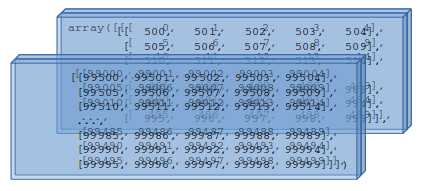

In [267]:
%%HTML
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaUAAAC/CAYAAABe6MPnAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAsTAAALEwEAmpwYAAAAB3RJTUUH4AENCB4drM5C8QAAABl0RVh0Q29tbWVudABDcmVhdGVkIHdpdGggR0lNUFeBDhcAACAASURBVHja7J13YBzXda+/me3ALha9F6IQIEGCvfdiiVQvkWRbli1bkp8TJ44d+yVxbCdO4vg5iaM4dhw5bpJt2ZJsdYmiZFJiE3tvAEgQRO/ALrDYXWyb8v4AQAIgGlEX1Hx/ETy7s/c35849M3fuPUdQVVVFQ0NDQ0MjDBCnuwEaGhoaGhq9aEFJQ0NDQyNs0IKShoaGhkbYoAUlDQ0NDY2wQQtKGhoaGhphgxaUNDQ0NDTCBi0oaWhoaGiEDfrpbsB0U97YyX+/cgaHq2u6m6KhoaFxS+LtCvInm/J57Pa5I35W+Chvni1vcvN//m0XqqKSlRoz3c3R0NDQuOVwe7uoaeoE4MTPPjXi5z+yT0q9ASnKauLTdy5B1CYyNTQ0NCaU2gYHL+66QGKMBZcnOKrvfCSHYi0gaWhoaEwu1Y1tvLjrPLNSbKxdkDrq733knpR2Hq/lP148jqKqSJLMc2+dnO4maWhoaNxSeH0Bunwh8jKi2Lwkk5Z236i/+5EKSn88Ucu//OoQFpOBaFvkdDdHQ0ND45ajy9+Fp6t7qm7zksyb/v5HJij98UQt//TcIfKy4kmKj2Z2Ztx0N0lDQ0PjlqKmvpX3jzixmHVIobGtoftIvE3pDUhF+cmsnH/zkVtDQ0NDY3gq61p5/8gVslOjSIixjPk4t/yT0onLLXzr5wdIjI0kLz2WmsZ2mhwejHphupumoaGhcUvQ6uzk3KVGctKiWJCfxMnSxjEf65YPSmeutGLQiaTF27hS1UqnN4DTHUAJSdPdNA0NDY1bAmenl/hoCwvyk8Z9rFs+KPmDITYtncU96/MBKK5ycOJSMxsWZ0130zQ0NDRuCfYcLUNWJ+ZG/yPxTklDQ0NDY2agBSUNDQ0NjbBBC0oaGhoaGmGDFpQ0NDQ0NMKGW36hw0eFYO0OdhzxYktawOr1c7GKo7ONxq6hoRHuSDhO7eREtRM56262L41HN91NGiNaUJpRyLjO/J4jpnvZVmil704r1e/GuOh+bsu/cdPacLbR2KdOnoOS3XtowIAiWZmzZQuZETMtQioEnVcoPnWO8iudLPjcUxRM82kdGzKe8g/Yf7oFRImAkM7yO7aQMeP8Aah+Wk7v4nSDhBjyEIxezqZNM/nmS8J56BleuLKBJx9fhEUA0BO39F5uyz7Ie8Wh6W7guNCC0kwiWM3J4niWfLx/QLo1UPCUvEdVxr3cMc+G0rqPtw7WknJ7FobpbtpN6vC1y6SsvotY3+sEprs5Y5bhob7axNL7HyPZCFLz+7x5oIbk7bNmmD8AwUhM4Xa2LTUiINGy/3nONuexLmXGKQFAdZ3nhCOX7KiZ+iw0PFpQuoEQHZePcLG6g4Ako6hm0lffxtxYPYSaOLvvIBXlHeRtyqPpUhOKoCCkbWHrIrg4lG15Mvqhjhsj0XT0Nd491ErmnY+zqTAa0VvGwd+/yGXbRu66ZyMp5u4QFKg9gTNnC3Ez81oagSCOqxKzPtYdcHXRs0nsKMctZxE7o649PfbcQuwEqJnupowH0U7B1o3X/tSZrQj+IDOzIqiIwWLs/qfSRbtTxGqeoY9JqpeqI1dIXbWM1kO3ZrVsLSjdgIjeKBAMBFFEHQSrOXOmmdlb09Abkll0291Ed/wXR5s2c+99m+g7mzGcbbjjJq9+mLsCz1Nqs3TPAxuMqJZV3H3/JpKvBSCJzpp27Nn2Uc0VB4r/lWdecRKbcyd3rIC+j1Z9bfd/ahPm6T7lACgEAzrMvemfdGYiBC9BBWbs5Pgtghpq5vyecjLXfhzjdDdmHCjuEg6+tYNL4mYesc3MThVsOESxdT3bowO0EqLpne+y93wtoQV/x1N33xoJAbSgNADZeYTdZyPZcu9D2HWgdp5g53G5/4dMWaxYncug0+tD2IY/roGE5Ss4/e45OtOWIJ3aT3D5QyT1eyJSkYNgMIxu4k7xtmHZ9m0eX2UjcOVF+t7i9rUB45xiClL3m8/xUtNskiwCoCN62VPcuTq5O5aEajj88/+lXDWjBONY+eSfMTeq5+T0s9nJSrGTJKmAALIfrxqBYcpuaMehAwV//UEO7nyHs0db2fiDZ1keNVXtnkgtEh0nnuH3O8tRdUF8QhHbn7gd576DiOs+warEqX5EH6MO1UvNOz/g/bIggt+BP/lhHv3sJuy2QjZ8ag7Lyt9i1/Es7lmTOEX3OyPoGNYn1z5A40sP8o87VvDVn9+GXqgCDCTf9U0eX/wbfr7fj8KtsZxaC0oDUDxtqIlrsOoAxUfDqWO0hO6d9OMKkXNYlvJbThQrBBoKWbcycsB7Ix3WZCMd7QHUNEN4vVMy5rD+qX9gZezAS0LB9eF/crHwW3x+UzxS9c955oVz5P7pYow32H7Kj37TyOxqD3Pn2VA6ymi1Z7Oyz6ih+us4f6yCmKXryJyMt9Rj0gEg4W4MkfvQ35Ha+W1GmlSZdB1j1SK3ceV8JNv+9kfMMoPv9Df4p//3Np/49pdYGN1Oyal2Cpam9hs0wtIngoXkjV/ls3dHIBKk5jd/wQcVq3kwzwSIGG1WlMpAv6nI6dMxgpbeT7Tu5N2KfJIigpTvfZM6pYPqmhDy0UhWp4++GVPS98aJFpQGYEjbQOHFt9jxug2LEERnT0Vfs5/DF+5gTZ6bswdOUVNZibL7DSoNZlJWfIzCWD2qr5JTQ9hGOu7aonh06IlbvBLfz94l9pNfIuqG/iISOWs+wu6r+AoXElaLoELVHH3+36gQuwhGLmPrJ+8l3SIAPupOBpn/+TgEwJCylszmwzhCi0kxDLStJ0faTXTVe3xQa0QJRbBkS2afl+oKvvKdHCjN51PrJkn8mHQAGElYtpUEvJSg4Dqzgw+8flxV1ci736DWHE/hhrU97wanQMeYtSSz/Mknu7/vL+P9HZWE5Ciajr+DQ+mg3rOCvH5BKVx9ImK0RfQ00UVTvUKw+B12XwZV6sJPKstvSwsTHTBi/1I7KHn5IHmPPoz5JSdLc0yUlHeMoRFT1PfGiRaUBqKLZc6dn2VO3//b3PuPeJZty2bZthu/Jliyh7SNfNxuFE8z8tx7WTrENIkQVcRiy4tcaJvHysT+rhPMNoJH3mJ3Y/deI90obYPZb+4GykDCx/6Wj0fNJTkSvOef5ic/O8oX/3I1EYKE32sg0tj7nsiKTejArwAMYtOFyPjYw2SbBvkZxUPlqXbyt60iZlLmXMaqYyAi9sV3s2yo6btJ1zExWlREbMYEbv/rr7Ate4i3jmHuE9mxh1f/43sc13+Bv7nzQYacfZxWHTDotdBHS6DsN3wY8yRPJXt5GR3Wgq1s6TOQyPUHARnnqbc4U+2ErDmDN2NK+t740YLStCPjvryPE1c7cFdexJW6CYc/h1TLIJFBsJC5ZTuiO4SKvt8UnjHjbh7MuP63b5S2wew3h4ApZR7JPX9Fzr2bvJd30SatJtOgxxQZpDOoQqQAsodO1Y5JBBjONghiFPMe/1vmTZofxqrjJpl0HePXoriO8ub3n0X3yae5J3uYZTBh7hNd3BYe+d4m7jj+HZ57fQlffCRn8AFvWnXAsNdCqIIDr/jY/JUCDJwe5jd0xC69l+1Lh/nIlPS98RO+z3AfGXTYCray5c4/4b4//zafeWDj4AGpB8GSSkaiJazeKal9Jufl9hIaIguI1gFYyFhq5MI5ByoQajxITeIy4g0j2XqO673I3t88R0m7fDPNmWIdozz2DNESqnuD33z/HRK/8CPuyW/l8DulBGegjuuImOPjkF0eBj7YTqWWoXUMr0VxlVAbbOP4s//M8z/5ORcuvMCrr5zAo4zyd6fYXxOB9qSkMT6UFs796mmOt6ro9CJSMJ5VT36l552YiH3DV5n/s//k+WILSiCa259c2PPydjgbgIL7+Pd5+eA6/uHRKZhrGLMOAB81b/6Q/TUe2s6eRvrZP1FqncXaT3+GnEhh5mjxHuIXX/4XHMvuRPfGv1EhNXCl/eMsvmtuj9YZokNq4NQLP+diu4wadOFlLnd8Yf6A5exTqGVYHSNoib+bJ/5pO+1Hfsa7R2+2musU+2uCEFRVnZn74UbJj147S5PT95Er8jdwL5JdHJ0tbFBaOPjXj1L26Tf43KIZnsHiVtFyq+i4ZbQEadjxfd7rs0+pX+iZQo29Rf4KsmIBOFnaSGNLF0/cUwhAS7uPnYerOPg/nxjxWFpQ0tDQ0NAYFxMZlMLxHllDQ0ND4yOK9k5JQytdoaFxS3BrlK/QgpJGmJSukGjd/wv2tycRYxQAkcjcjawosM/Ax3mFYOsFTp64gkfVobPNYeW6GRjsQ7Xs+/W7+NOTu1+6K53U1yew/XPbSJhhI4fqLefoB6dwiwJBn46MjfewINE4A98lyXjKdrPnVCuiXkWXtIqN6/J7NtPfGuUrZljX0ril0Scw/2P3MWfGjd79UTrO8OE5E8u3PcSMri4gWslceQdp8zMwCSC37eedC3nEzLhRQ6Lt5IfIyx7j9lQDatdFdu4oJu+hxUTOtK4WqufUKSNrHvk08ToFz4VXOFqZzubciBkYYAdnxnUvjVsYyUHp/ndoFIJI5mwWr1tMvHGmXWohWk6XoDPGc+LdEmRLPss2LCR2lIl0wwpdDDlFMT1/SDiKq0goXDsDBw0BQ6RIp7MLJTUKqbONgCUF/Qx0CaIJi9pOp18hPkImGHBTW9eGnJs5A/0yOLeKDo2bIDxLV+iwL7iLjZYUYs3gr3qPt3df5d478zDNpMFD8dBYXkX76ru5d4OdQPmbvHckifs2pMzI+f1rhBoobcxi/rqZOGToiF6wBduz/8OL56LxNuhY8dT6mdWvrklJZPFt2Rza9RKX9Wbky3u4VLWfX8jf4fMDl4TPUGZiD9MYJ+FRumKo73XPp5jTF5F25AIuOY/EKeml4yxdUf1H/vjmQdoVmfY6E1sfi0EHRGTOJ+JkHT4lZYreKY2jTELgPC9+7Wm65s7uLrEtt3KlNIcnf/hlEutP4cxe3ycLQRhoGcYniusIO372Gg69iN+tJyUvg7g7/4pHMy0ortO8995xZj28muhw8MmwfUvCdeyH/PbtSkSjij7nUT7+6Fo2PbAEkOmIbyGwXEdrfXfpCi0oaWjA2Es+DPieql6vRah463GYU1jU55BhWSYBkJvf4uVdEdz5Z98lziDRsu9ZTtd6KCqworgb6bKlYxxwyEnVMtYyCbp45j3wNfK2LCBCAKnmF/w0ajVJeh+151xkb4i5YdALT58EqX/zOaT7f8TnZptRO9/h6a99QOId3QsbdJZYIqWy7gKSYjjrAALFvPd2JPd/+8ekGWTa93yLt8/M59GldpSOcxwqm8XKjS3sqB9dM7TSFRofDcZa8qHv9yLmkZ8m0O4HURSQJStztm7rU6IjXMsk+Kl55330llm8++O9hKLWsv2Ru0ja8wo7Si0IchSLbs+6IcXNpGoZc5mEVBZsTe35XJCGfafJ2PAZ9F2XKPEVstE+MCSFq09EzDE62upcyLNNSK0N6HIW4Nn9PDuMJmQfJK+/t88KwnDVAYhWrGo9rV6ZNLtEoLOG0+/+iri6eCRDNosfuo3kjt+NshFa6QqNGcL0lK4Y5Ht71/VJ5z+AcC2ToDipOHGKloe+wZ8/lozv+D/z8zdn86XHPsvioX5qUrWMr0zCNfwlHClfzPpPGhEMC7h7sI344eoT9CTc9kVi//IR/t+uFDrKDNz14+fYkjLEcBe2OgBDDrd9YRmv/+//5YQxjlh7NNGzNrLlvkXXbnTka6WVru9TGrR8hVa6QmOmMD2lK0ZK5z+AMC6TIESvZsvq7uJ3tqLbidpxEY9SQMy0lOEYR5mEPvgvvU7ToidIGi4Tetj6xMfVX/8X6pd28K0iG0rLm/zif/5A0T88SsJgg3HY6uj+rjHzPj7+9fsAieZXHqdudt/il33p3qc0ZPkKrXSFxkeFsZYXGD6d/wwpkyDGkzfHwfFzTlRAdlzCHZdxQ2XgmVAm4foBOinb3UTRmrQb3yHNBJ8g4W0Xiesp8aKLyiQ62Iavz9PgzNDRH6n5Hd44uoR7VsSOek+SVrpC46PHWMsLjJjOf4aUScBIxiNfJ+vH3+AnB6IQpEQ2/+kS+hfPnSFlEnpQXYc55P4YH79h2eNM8YmNws89wMs/+XN+YrEhuSHn0W+RcW2gnyk6AF8xu3/9Mg3uDnzmZWz9+y+TM+o9HFrpirBEyxJ+I1rpCk2LpuMW0KGVrpiZaEFJQ0NDY3KZyKCkTd9paFnCNTRuCbQs4Rq3CFOXJVwh6LxC8alzlF/pZMHnnqKg70/KDkp276EBA4pkZc6WLWRGhGOEHE7HCBrDjuHaK+Mp/4D9p1tAlAgI6Sy/YwsZM80nqp+W07s43SAhhjwEo5ezaVO43nyNtv9IOA89wwtXNvDk44u6M3DcIlnCJ2z67pUDV/nJ62eR5PBa5aGoKqggCN0zqiqgquq1vzUAVUFFZEpOSW/aBlUFYeASNQUVocc3avdHwtVPw+oYxhaODNne7mvneseYwT7p9zkFVRDD913SMDpCoRB2awSf3iiwa38jkpTJlgeKsPQRIzsP8l5xLtvXT12+xbCbvnv1wwr+86Xj5GclMic7YYpOw+hodHgJSgqxtu7bja5ACE9XCJvVNM4j3zqo/jY6iCXGPFUDqEKw3YFiT8DcZ7Vd0NmGHJ2IRQQI4m7zERFvD+MpiMF0jMYWjoyivbIbp0tPTKwlfAf0EXXI+B0OFHsiEWE9T3SjjqraJmqbQjg7u6g60kDqqmW0Huqa7oZOOON2y6sfVvD0i8dYUZTJxiXZ063nBlRBxB+USUuMAsDlCeBw+UiMtU5306YN2VXMlZoARmsa6dlJ6NwdiNhJs03V8C/jDblQEqO5/pMSbr8LITEaqw4ggDMQwpIY3e8uMLwYTMdobOHICO1VfbTXtWPJSSPOFM5RdmgdquSitbYJX0Qys1KjCe+qKP11nC2toq65k8xUGw1Nboqt69ke7aH84rM8X+pDHWz13QxlXEEp3AOSxhBIfnQpC8jp2aE3vglXma6KI1T5o7DoAAQMcXmkxVsQUJF9rbTW1+Ns85O0dDVx/TZpemktu4IbERQjERYDFlUFBFBlJFU/hbu7x6pDRfa10NQ0hMYpZzgdve0dWkvIeYkrTW5AQRaiSSnIxy54aK1rgcRZJExpQBqrT2R8DRdo8SigBJDNWczKTcKot5OYHUWsu47GtkjSE8xT9MQ3jmsEOHepkksVrRTEOKhuVFBUgYXLUtALVdjnP8Fty8/w2wO3TpbwMb9Teu94Fd9/6RSyomIyhu+pkOXubdyi2JOJWlFRUBHDdV58KlAkZHToxJ5zoCooiIhjPCWqLIOoG/SdlKoqgACKDKL+2mdURQEUlN52qDKyDIJO7PaN2n3xif0apaIq3fPsk+G+seug+73LYLYh2zp5WobTMawWWe5+haTTdQ/WqoysCAiAIIoIwmDvlMLUJ33ao8oSiqhHd+3VmIKsCtf7fxjr8AckApLEgiw93nY3nV062kJG5sU6EZQOqq+GSMt1U+66i//zqQIMDP9OabKyhE/7O6VDxc38y6+PYTDqiY+xTZiwyUCSFFS41gEVVUVR1AGD3UcMJYSMAV1vn1RlFHTjCEohZFVAoPuiFnsHtb6fkUKgN4Aid6dcUdXui1HUI+pEBBQUSeke3AVAFRB0A15GqxKyIqLTTc7d+lh1dLe5e1ARhrAJ4tRpGY2OkbQIooigSkghtZ8fVIT+bQ5znwiiCFIItd+CgZnRt7zeLgIhGRAQO9uwZWXgK/MhKiorc22cuNJxk624RbOEHypu5us/2UdGSjTpKXHMzoybbg3D0uT0IkkK0T0LHXwBCY8vSFTkR3ehg+KtoVVNI6n75Q1KsIMOt4LOaMFqs9z0FIAS8iHpLBhFkLsaae60kZRs7XMcBV9jLXJiVs/7IgAZb10dpGYRKQJqEFeDA1NqCuZBg6OMr62FoC0Z+ySVDB2bjtHYplbLyDpG0V4lQGdTE2pc5jBtDG+fqFInzsYGPEIiqWmxDF2RPvx0VNe1cKbEhdmoQ5ZkOky55JklWno+bSvYypaCntbX/4bK/fCRzBLeG5ByMuJYMT+TqqbO6W6/xgQgGqOJHce9hWiwXMvVpbNEY3a6kFTr9emSQREQdArytUJrMjK6Yd4h6bDEpzCZW37GpmMsTK6W8epQZQ/tja0IcZnEDDtIh7dPBH0UcRlRRHvraXUGSIozDfEOKbx0VNQ0c/5SHRnJUXgDQdqdEknpUYg4R/iVWyNL+KiDUll9B1/54fvYbWbm5yZS09hOk8ODUR/e02BtLh+SrOL2+gDwB2V8/hCdEcZxHnnmonR56aCDkHcSpo6kTpztItGG9n53gX6nF0VtJ6LPHZrc5cNV3UasVYcadOLwRBCnb78+cCh+PC4felsM5ilevnszOka2TZ+WwXUM3V412EmH04cpNpEIVxutdSqWKNMM9UmvJh8Oj5OQZA57HR3t1dTWtTErNYrMlGiKrzaiAo6rF3CqPjo7ZRRjCh6FUW3+Vb0X2ffqCZLu+QyF4fx41IdRu+PUpRb0OpGclGiuVLXS6Q3gdAdQQtJ0axiWzq4giqLiMncvaQlJMoGQjNkY1psUJhU14MVDO74JmapQCHo6Ccjd0/iqKmKyRuFvdAIqUpebgKwgBwLg8KMT9JgiI9GLgKoj4KmmFQFUEZMVAo3X910ofgcdXhP2WHUSnlYmSscIGqdcy3A6GF4LAdyOdhSjBX1nFagyISWCKK/52hPsjPCJIBP0errLnaOgYsBsFWZE35J0fqIidCQmRXd/VTCg08mkx5mob/Pd9O/OxCzhox6ZfaEQq+en8fDHuh/+Zkpi00s1Tm2f0gC69ym5ru1TCs9nRj8tpypwL9pEbsxMv4G4VbRoOiab0xcqMJuEGzb+GuMLyI6H6DQ/Z0qbe56SrmcJFxZsvHHqW2nj/I56ln3xkySFl8xhmUFN1ZgodPZ5zCma7laMhJnEpR8jcbqboWnRdIQtRlLv/iZP3D2EWUxk3dPvs266m3mThO+6QA0NDQ2NjxxaUNLQ0NDQCBu0oKShoaGhETZo75RuEqlpF8fOdxERN4+5S2b32+g5nE1DQ2OmIOEueZ/LjR0oKbezrDBWu3ufQrSgdJOoQQ/6gjtZnGUehU3BX7OXs8VtCDoQ45azYEkO11dij2BXnNQcPYhDNaBIkWSsWk9ir3GstjEzXFsnSQcqkusqVaUXaaz2kH3/Y6SPOxHHOHSMWYuMr/ZDLpS2giATFFIpWL+ehBnnkwAdJXspb5UQJC+SbQkLl0/Ezdck6RiNHRn32V+yt3oN2+6bT3f30mMr3M6StGOcvBpiQgrOaYwaLShNJnIjZcVG5m77OHZRwVf+NqX1KSxM78nYPKxdxV+xh6ak7SzPtaK0H+LY6XpiV6ejH7NtkrRMig4AmYBbJnbhNqL87zAhtTTHrAMYqxbVi6PByOwtDxOjB9lxgCMn64hZmzHDfGLEmruFpYVGBCQ6Tv6Bq45s5sWPcxiZFB0j+asb1VNMWUc2yeFZhvYjieaJyUQwYlJddAW6M2JLQQ+tVQ6UUdmDuGpkklMjEQBdVA52dw0+ZTy2QZC7cLW24A4qw9sGttXnoqm0nM7BbEEPrZX1OFta8ErjaaueyPQCYi0TuPFvuHM+kr/Get6FKNJXrqF3S4xoioTABITYMWsZq08E9CZjTwZxH55OEctElLKYFB2jsftoPn+V2IV5YV5b6aOF9qQ0AsGy/+SVne1EZW5j0/3rMI3SBoAYT+6aTEoOv06dPpIIs77/7vFh7QpSSIeh9z9EEya6CKnjsd2IGnTS2tSGQWfHGts/N1h/W/+2WnQKSlcbTk+IqNhBdIRaaXHZyE2YuLZOCMOd85H8NQHnXZVaqTxeQdKi+8d/8Y1Zy/h0qF2Xubh3F3W6dayPmICgNCk6RrZLLceotqxhmc3D4dLfsLPUjzrna9y3NeOWqEs0U9GC0gioXQ5MG7/O3Yu7S3SEhrUpBC79hJdfrkMwqOgyH+H2+1axYOsCQMZz/te01P+BV/+jHvEGu4/KZx7kovcy/is9Vb7UeArlnqJ3wSrKjr1KoPEkeslOWko08aOxKQECRAyZIVmwpJNXlD6IRcZ76XXOfFCFYFA53a+tQZpf/yIHzp/FW/U2ZwfRcaFtDo6UBCoPCaPXofjxdlbS8Pt/oPpMG0u+/Qzzxp14Q8Zz5hne7dGhG0TH/vNHcJwU0d/gr19Rd/xbvHAhn7jeFyej0iLjPvsLDuwpJeLSDhSxkDWPP0WWoZqSvUcQFz/InNixVAIcq5Yx9i21i6YPfsjBQw5sZTtREx9k+0PrsEYUUHRXPvk173LqYgarFsbf5JTLJOlQAgQUL1d+94+0YUYJDXYtGHHvfJRfnHmQO9fYydmQiI4AtrmfYVnhWXYe82vvkKYZLShNJKFGKo9FcMc3niZRL+M+/B0+LC5kW1EUqruYkqvgLrez6a++Ooi9hIrOTFY89S1WxYuAiv/Kq5xv8JKVG0HngR9Tk/kVnnx8AUL9c/z+9WZyCrxkDGuzonRepcOaRUHfEjjBBirPV2Odt5JEyxDDSbCUIx9EsPErg2hxvMN7BxO47bvfY7Z5cB0rv/j0TeqwonSW0SrFkH/XI6R7v4t/FKd8RC1j1lFMSVU6OfG5pG36OvOjb0LLLC/V57pIueOfuW1jBtT8jJdeeo2WdDNJqx8m0+aiprSD9LnJ1+7Ip8InY+lb0XM3kBeRz6o1SbS9+n85XrOcLbNMgIA+MhK1IXDDID55PhlOhxWls5zmpvdpn/OPPLgqDnmQa6GdKq40rCDX7qJT0hE6/i51cictjUEksZOhZrlvut9pjBktKE0kohGD2khHl0yiTSLoqeXS/heIb4tHNmSSd9tGguUvDGFPJSNH4dRbP8AldhGyeFYK/gAAIABJREFULGbF3ZtJOruHs00KzYeCzP+z+RgAEleTGtpLZP1INgOKFMHslX0XOagEa97nQmUeW5YMczGJEVjUhsHbKhpISbCgBmUwTZSO7rYuuP9PSDT7qAQgSEfxPirbA3Q11KAc2UmLKY6spSuINQqj0zJmHZnk3b4Raeer7HntB9TfrJbszSztOe+KQcZ16RCdOVsxXNyNU3bh8C0h9VpQCm+f5K9MR684cDQryFd3c7oWVMlPkCTy16QOmOqaTJ8Mp8OAIonYvXri58YiAPobtKhY6svIuus+mt92sWjbFoSag1yuutkSPKP0l8aY0ILSTSIYrUjn3+NM2zxyBvRHwTKL9LlNHPvhX3I+ZRaxNjvWtLUs3FzUfcGjsvLRxez97TcpNsZh72dXCbbEEGcrIM4CvtIf8cofEnj4s/eSJXRSevwwuqieHxQjiRSDxK26lzTjcLZBBEj1lJ1qJWH5Qzemvpc6aKlzoE+aRawlu39bIyMw2bLIXHU7iRaRUJ6uv46UBSRnJWFLz8bSMRYdg51tI9HzbmfxkN7w0FTiIn3N0qHT+Ouzhz3nN+gY4K/gur/i9nFoUQMVnHmjkiVf+R6rM8xj1zEuLWPtW93/pbTv5/0fPs1F/RM8vuFuYoadeZxMnwynA6CT0tMfoOtdtTBAS/DqT3jL9RnuT/DS3P0BLFkbWNSTU1pueoHqY9B3nxIpswepwTRKf2mMCS0o3ST65NtZm9z978BZ6Dt3oU/exoZHtvX8JeHc+QVaZvV9ShEwpN3N7V+8exC7gDFxLr219ix5d5Cx8wM6pJUkG3QYLUG8QRUsAihevKodowgwnO1GlK4OpIQ5RJsGs9VRX1GNyZBCTFpEv7a2vfYpyixu2pwBEgbYnDu/QFOMh4bWBIqyxTHqGAs2su79EsPnqR/+nA9tG49Pes6n+zj7f/pbxHu/y4YhA9JodYxHy/h0iDEb+djfrmfNuX/jrV0Lefiu7GEWAkymT4bTAcNeC1IVZ971s+yJ2eg5O8J57t6ntKxwvP7SGAtanJ8k5Nb32HdmEesXxQxa7XIwu9onwCmdl2i1zMamB7CQVGSkvNSJCkgtR2iKW0z0iLae4/pKOPnqb6l0yYhR81m85S4K0yJuaNdQNrn1PQ6UruOexx4Z1LbvzHyKokTi8rOxCGPVMTr6aplInwxlG6sWqXEH7/x0F7Gf+nc2ZLdxfs/l/otkxqFjLFrG7xMRY0wcSqf3hvcuU+mToXUMr0XpvERT0EHxH/6Vnb/9NeWXXmbPztP4RrmqYbz+0hg92pPSROIv5dgrr9PqdREwLWHFX36RNNMo7UorZS//N8VOFZ1eRA7GUvSJPydSABCxrvgSuS/+NzvLLCiBaFZ+oneKaTgbgELX2f/i/ZNr+Pz9N7HQdbi23mD7SzJsunHqAPDTtPsZTtd76Cg5h/zC96iKzGThA4+SFiGMTctN6Rjgr7Fq8R3ljX/8d1wLtqH74w+ol5uo6XiQgi0FPVqnwicT0LfkJkrfeI6rLgU15MJHAWseLaT/7N0U+mRYHSNoid3OfV+9jc7Tz3L4TPPoz/l4/KUxJgRVVUd1r/Dse8VcvOr4yBX5G7gXqe8c8nC2sEFt5ex3n6DmgRe5Z5510Kc2pauOulYZgyWahER7+N6pjELLjOBW0XHLaAnS+sEPOXypHnmwfUpTqLG3yF9qQvc2k+KKNlwuP5tXdI+z7e7uIn9/8cm1g3xbwnFqJyeqnchZd7N9afyU7bfac7QMWZUoyIoF4GRpI40tXTxxT/ccaEu7j52Hqzj4P58Y8VhhO/6EC8b8r/Jo/s3bwgYhgUXfeptFw3xElSV0sRmk2CayC6sEWy9T6U4kLyf2+sUhuWltciIJoMgCEUlpxJh0gEqgpZzmoAmjIAACelsicVHG64PAKLRMPDero/s7SqADR5sbCRAMduL7Bvtw0jGcFrWL5qv1yJGW7nl+JYTPZyI1N/V67rlw0jKcT4b1l5GErX/NfVuH+LlJ0ziEDlXC3e5EEUAKBen/2KCiKgpvvfg8ol5Fl7SKjevy6d7DrCdu6b3cln2Q94onJCnXtKAFpQlEyxLeh1A7joANq6Hv46NKwNmCGpdNikUEuYP6Ohe2rNjujiiYsCdnYNeH0Ykbgw416KSlXUdcauaQm5bDQ8dIWvRExqdhiY5AB6iBZuo7bNOfkuemfTJCv7uBKcoSPoQOOeBHjUnGbhDQO5pRVRmJnsFa9aOqsOaRTxOvU/BceIWjlelszo2YoU+pN6IFpQnk5rKET1ZGagnXyd9yvjMBq1EARCwZayjIihpnp70ZLUvITTZiSYjF3yKD7KTm2EEcqh7ZGyRiUToJFiNqMIAsBqg7dJB29ITcASILRHxGBVVnJTYxGp2rlLKLV/GhQxcxm4Il+VjGJWSSdOgtCLKTmmMf0uzxEVCsdBTMx26JIi7Ox6W3PyCYlIheABQPjuY4lt2/GfuYH05vJgO9imLMJHdlEUKbPKD/DOeTvn0LAi4vJpOXS/vO0SUISAE9CctuJzvWGPZ960Z/mQhWf8DJksF+cyqyhEt42tzXdfRFBDmkoBq6ZxCAPue3e39ep18hPkImGHBTW9eGnJt5ywzmt4qO8GQ6MlID6OOZtepOMiIGHypkVzFXagIYrWmkZyeNbt75JrR0Ff+e0+3bWJMi4B/YVsde9h89irkwGdknYBPPU5O8neW5kcgt+zlarlKwJgPB20BdxRWcbVEUrL2XiUixNnk6ROLz4glVvk5T4hbyEutxG53U1+vInu+hyWEioWgrcbPTMAJKx2GOm7Oxjme29CYy0NsC9VSXHKOhNZ9kQX9j3xrSJ3361qoYOn1mhJp9KPMfZmm8ATVwiRP7L5N6exHmcUiZ/L41iL+yLZTvG+76m1wUXysufQKpBmVA5hIBncGCztOMo0tHMCgjCML1a1QwI4oCNbte4rLejHx5D5eq9vML+Tt8/u6sWyJnnxaUJpM+GY7tlp4Mx00OlPR0dMPZgGsZjlf3zXBciU9JxyYOZwNkJ7WnduMUgsjGTHKXFPWfEpP86FIWkBPfvY5qVItch2xvGrKzjk5XGVfOGomOTsHg9NJFF6pgBLmVigttCHllXLkgYomMwCqESMjKQ6zYy9lTLRgKK6i6LGCIzibGU4tPycAWYUOuuIQam07Zh2XI5hzyl83HphvnkDHhOgqwyg7qq0qovehAzK2iRdKTPD8fz6VKgpYi9M4gCbOTei42ic7yWuw5K8Y3gAynw1FKZW0Tna5KysuyybAoWE0+yqvbSZyVgBps5Or5QbRkJNJ2+jSVVa3oCyupuhzA3SES0VmD16MQsCYQ4xHxdvhR4/XIHgchU9L4p7YmwSeR/sucfLsFdc5g/nLSUNeGftjrbyJRCTpKqazzIIggRqYRpYeYNAuC4AW5nfqSCkKigKdTRY7QY01NId4o0OxqwusNcOnccUQRfPp0VEFk0wOPAjId8S0ElutorfejgBaUNEZgWjJS64jMv40iUzI2IwQb3+fYESur1ucwlhSgI2pROmhsiGHh7cupPFOGo6mELlVA1TfT1ODH3VKBV4giY84S0oR6Sk5dxSgGCKlg1kVg1llJyF9ApglQnPh7dKiSE2dbM4Hs+1i9zE6oZicnzkQxN9OCOTaByLG+d5oEHYScuFwSEZY4EuYsJqa9HKdP3+2ToA9JH3F94JaaqGlLJ3thkPYWJ8axahlOR52BjIWbyZ0Vx4UP3+GsbMduDaJITrxeqC+rJ2iMI33OElL6aTERk5GDp64B++wiMuRyyvQGRFcZHmcIa4oZq309Ea//kr2X7fhbRebcvwBvSwuhsPKJjL+pEVW0kjJnCZlif38JOiN6rGStyuRq72+aBPC10yWlYZvod5q9PlmwgghBJVh/nLLOeJSmOjoJ0NFSjZK8jIJMO65zxfi7/Aji9UKXqgrJ81cQrVNpqTxLiysGFVA6znGobBYrN7awo350TVH9dZw/VkHM0nVkhuVyYS0ojYsRS1cgoI9e0Cfr9PO4rL0vTYezAYjoDRKBQbN9D2cT0NtSsPUcxZhYRNy5UrxyDtHjuzUfvL2CjF7tQrIuZMHWefjqj1FcUow/JRYdMoIoogoSQUlFVroQIy0EGjtw1lcjtnsICj5ay84iWaKxmZ20dfmhvhofASKickmfFY0ImFLnYjxbSmPUYvITxjNoTLSOCjpa6xFt0Xhr22gvryc6Pw1zfTHVXX5oDZGcFnnNr1LLOTxpqzB562lwRZE9Zi3D6fASCEFE9HzmLOlC9OSR6XqNM4IVERD1IooQJCiryHIfLY0tmBUJs00PikxXk5PI+DRcVwQEJZokYwjnkX2o6/+UzclmVM95Tuw7gHf2MgrCyic16NwhMIuoiooc6muroksBc1I6kRGp17OP/+Ipymr30SH+PQ9OdOkKQd/jE5UIo4KMgizGEGsL4nQHEEQBKSChoqIqMqLeiOJqpV0UCUkKCKDKKugUlJAPRY7ij2/+DsmQzeKHbiO543ejbIiCr3wnB0rz+dS68AxIoAWlcTHa0hWRIiju85w5fJ5q9wUajANtxZRUpZAQ+BK/25VLrFkAdJjj44ls6Mlw7DxK6ZnDVDQdgFAs+cticDV4ycg10vTSX/BBeQE5DfsR0WNd8BnWLemeVlF9TXQaksjtc5WpIRdtl49hX7GGRIuIoNMjt9bR6Ou7T2nw8gKDaknezFy9hENnwiDXU3toB+2JrXRGCKBKBEIGXEf24DSYSc1t4WLZYVrcJai+CLJXJOOLyCUzrpbLV1sI6N3UfvArPKoOuStEfN0dJGVHoHoa6BLNpKbG91v9NXK25knSka/i6EjGvf9Zyhvb8FuKWL4hAX+wgcqKeqqf+w9q7XNId5dSLrdSUz6L+779OdTLnSQvs+JrbSIq5bqW8ekopqQqjYzUX/LKa1UgduE/uorF65cQZdIhBEo5tfs9amIc+PtoaT28h7YBPuntW011jSi+GOL077H3+EWi6g9w1iMSm5bNrPndCxsEkw3R58VyUzqmpm8RiCAmAS71asyXabhwgao/7Ed3w29eot52D1s/JVFcOrrSFTeVJVywkpIfT+2VUzhEE0aDDlEAfVQyyVGQnBxPzcnjlJ614HKZsSfFY4/rHlMa2tvQiTKdPd8NKnoEQWTLfZ+iN8Wi3NH7Q9f3KZE158Z2KB4qT7WTv20VMWE8z6cFpYlkYOmKD/+Ot/5Qx5wkCAoy7a5Cbv/aUzfaejNS7z7Ook/0lkkAZCfVR/dwtklPV+mbBNf8B3+yPh65/jle3pPCipw9nG0S6GhNZOmffoe1STpQ3TSe+ICTe0AUBRQ5koyVm/s8xakEG0tobFjI/J6qoWJEOpkD90APLC8wgpYdF1cwJwl8/gAxuYuYfc/XmR+t4r5yHGdcLpQexSk5OPfyG/hX/4g/2dCrI5UVOXu50KjiqjxFMxvZ/ulPYteDKjVx9cO3OFZpRlBsFGzZTEpE/+WzI2ZrnhQdTkoP60mPPcrF2V9iXVEzxtjz7NqfyopZldRUdKLk3sMdn/o0GRYBueHXvGZdQaxUyenAHIqsJiJs87BPlA5DJnmbkjj9s5p+9h0XIsmLbKXDNJ+suYtJ3jJan6SwLHU3FSE7lbs/IPrjv+SeAguqey+v/fQK1kO/p9VoQglAzPp7yI3SjV7HlPStGFyHv8OrJZvZlOCiU3JS+mEz7bVJbP7aNwc9f3Pve4TojpcoHtWFfrNZwgXEiHSy5qUDKv6aQ3SZe5+eZdwVpagFmymKNnDqXDEht5dQku36dgJBJGveMkCl+fIR6kRhiKn47n1K25cO0QwxinmP/y3zRqVx+tCC0gQimKPRufdy6sgmNq+dRTDoxRUoYP7mIgxSBQdP/O56uv6+NgCCNIdqudC3TMJ9d5G19l6y8FJxYTe2BXHXUvInO45h/+Tj5OqDNDe/zZ53/gvPte/dx4ohN0l5aK7oInrh4uEzUAwsLzAKLfNWx1Bd4kDvPcDR135AvejB47Ez97GVFK69lyy5jiMHdxE3iI4cuZyjZ/9IVFoxh3/9ISHrKtbesxJr1nIS0nOwD7o5ZhTZmidFh5PqC9V4jh4g75PJRDlqaDQsJdlxhqj71pLSEMPsOXHXFqy0HjlL0tI7cTR2MmfLXG5cFDlOHQBSxY12bwy2/ELmLszD++bzPSU4RuOTw+gWzaMwbykm/QH2Od0omJGcVQSiZpE0O5fojMF8Msrs2ZPetySILCTRVYV95ePkCk6qz57hauXh68f1ddDWEknmg9uJ69FxfcHP5GUJV/311LbFkr7wWu4k5KCAydyTclbQIaqBQes6qf56Gtvt6ARh1CsEVe9F9r16gqR7PkNhOD8e9UELShOIPu0xPv6VGPa++RzvXo7DbjNx7Z3pDen6+9gAMBAzsEzCi8d5+LMrMQsyAZ8Bc9+U/EIHAWWk7w3WShuZm7YiqabhO/Zw7e1rM0QiSn4kfykV1ctJKyrClH69PV3nvstvf/4b1DuL0EteZH00cSYB8NNeVY238xJXS87QLroJNFzGtfjvefiBJALn/pXXXnWTl7+IhdlDtXQU2ZonRQdYZ2Uh7jVgMOqJzJqHtfRDPJ2XKK9Yzpy5fXbnBy5zoWoB81dfoaY2gaJBtYxTR1/783/NSb8ek6mLkCyRVDQXqw6M60bjk56+pTbSHNrKUose4/rPE/Xtz/DsgRTcFTrWfPlxmtsUEnPGqGNK+pYBe14O+jde5krxKRyANXcd65N9Pb8Zi1UIIPlUjIPubp7gLOFyB40VNfhCQWRdHMk9PunGgD03g46y45Tp9Lg7BSKj7df3m6kyiiJTUXISWRdHfEEOzisto/xhBffx7/PywXX8w6MzIyCBFpQmmOkokzBSOv9B0JuRay5Q4e7ep2ScAC274m6joKAnm3Of9kQUPkL++x8Ql7+UZIMX/ZHXenSYiZmVRWRUATmFi0kQG3HZV7BsSQo6IKJgPfpXPiTyrgfGuVl2MnQAePFf84md5II8rFFt5M0vJKbPVRW4+hZt8z6O0Fh1LYv6xOvoY//zvlpWEN0z6BpH5ZOeviWkMX9BFkb81L3yDOrnXubJAhuK4w1+/8O9zPvyN8LQJ/11CEYrZvtc8uYtJaH3JEX3HtfDlZ9+murlK7BOxaYkXTQps6OHPhvmNGYtSAPAc6Hi+s0ngKBDFHXkFC4DunPfXSdIw47v8975WoQFG29cmq+0cX5HPcu++EmSZtBIH75LMGY4U1kmYfh0/jem3dfZ5zGnaAk5Qwak8WkZkw4xjvQ8B8Wl7aiA3F6FkrONgtj+V9NMKJNwvbFuaj5sYfbSbJKXfozcPtFqsnRMqE8I4XMJRMd2p7DRWbOJj0wgKWpidEysT0ZfFkVu3ceFti3csTZ+9NNgYVm6wkjq3d/kiW/8L18YbOOsmMi6p9/niUUzK1HuDIqfM4DpKJMwYjr/kdPuD5olfKrLJGAk6a6vkfLrf+KVYzYEKYFljy0aEDRnSJmEHlT3Uc55NnF73MC2TrCOSfOJjZyH7+X9336VV8xWZC+k3f83JBnGoWNa+tYozt+wzJTSFdOXJXwi0UpXjINbpXSF7K6iiQzSJj1LuIrkbqTJ4UcQQTDHk5gYdf3OSA3gamrCh4iq6IlKTiay747iaSmTcLM6VJSgmw5HO253iJjcPKIGntaw0TGyFsndRLPTD4KCTATxaclE9Ppk2spW3KxPZPzORpw+BUGRUAxxJCX3LdEyXaUrbtRx+kL3Jt9IkwgC1DhkvJ7QIKUrVuI89AwvXNnAk48v6jedKjsP8l5xLtvXp2ilKz5q3CqlKyaFwTIgq104HSIJWTmYBBWpo4Y2TwTJ1u58bJKrAU9EOml2A2qgmboWL5YU6/U55unQctM6QAqqWBLSMMm1g66iChsdI2oJ0eUVic3IxiKC6m+ktsVLeq9PZkzfEjHaU0iN7U5w6m+pwOmz9dlfNE2lKwbVIRMICiSlxGMQoN7RgDLIY4PqOs8JRy7ZUTPxWWh4wvHefsYiNe3i0K43OHPqCv7JSS08Q+jNgBw14E5NREeQkKwCKooSoqsz0LNZUSHgUbFG9rzuNtowB71I03oex6JDwGi1Ywmn8htD6hhJi5Go5CR6x25BpwdZuYnfnUotw/tE1OmufT8YEK6n6BriN9wl73Hyg5c4XuJkchQPpUNAREFWoTdDuKqqN2zorTpyhdRVc8a54CQ80Z6UJpCpK12hIrmuUlV6kcZqD9n3P0a6aTTf62ZMWcJvQosQlUNizjyyejMg9ykvoARErLKMzWxArxNRvZVcPVpOY7Wb5KXrSBF62imI0FVFxdEjtNYMonHMTI4OQVAJucqpueaTTxJz/Yzjq/2QC6WtIMgEhVQK1q8nwTSeEWX0pSvARyByBSvWxl3PSN2ndMXQPulz3lUf7Y3tqB1XOX1VRpC8SLYlLFw+EXXDJrtvdetI07lora3DJSSTdW0puIz77C/ZW72GbffN79lkPvmlK4bMEi6IGCx6gi4HfkGHAjdOF6oKxdb1bI/2UH7xWZ4v9aEu+Due0rKEa4zIpJWukAm4ZWIXbiPK/w79a0yOUNYCxpYlfMj2mgm1HObo4WZiC/OIsKZibj5Ak38+WYKK7K2gdN8JmoRCsrLnkGkv49RlA7mr01BaL9DUVIcQk47NdI6gqiCrPfn81BC+LohZuI3YwECNk+GTsepIRao/R1tHGyUXGrGv2kbBQJ+oXhwNRmZveZgYPciOAxw5WUfM2oyxX4DD6XCUUllTR1NZG7FLN5JkVNH7T3G5PpFkQSTYVkLFuQ9pvEFLCoGKw9TUdqCPjsdicOILqaDz0FrXAok5pCXNItNkRECi4+QfuOrIZl78OIeRCfdJEt7Lh6lp6sIUlUCExY2sgqC3k5gdRay7jsa2SNITzOAppqwjm+RJfSE8XJZwD7K3kivnQogieLtsGGPMRMV0pxmqa/WCICCg4Kv+kIuN6SiqwMJlKeiFKuzzn+C25Wf47YFbJ0u4Nn03mfRJyQ896fGrHN3TAcPZgGulK1L7lqeowacA6IlMLyDWMlgXHO57k6BF6aCxwUxcVBQJs5eSaaqhpctDa0kJDfVVtLZ5UYNWcletJctSR4Ocid1dQ5ffSVOjC+PsrRTNX0CyVcTt8eH2SgCoQS9C6jwSIvpolLtob2nBO545vUnQ0dxhJCl3EdkZaUQN5hMhivSVa67tXxJNkRBwj0/LcDrqDGQULSbZZsOuq6XF24WrrZXGkqu4PXVUVASJFKLJXz1Ai6+FBmck2evvYdGSFaTbwFFRTX1dO8aUbBIsEt4e/6D68HSKWPT+MPRJJ25dLoXr76Bo8RIS8NLu7b31EtAZ9KiSAvhoPn+V2IV5GAngah6njqHokyU8v2g5maY6Wrx+OpvqaKqvorXNjyW1kNyi5VhEH13B7otVlbqQFbG7rF+ggQZvPFZ995Pb5T1v8sEf91NVc5RDZ9t6pvtGRvXXcW7/AWo80z0NOzTak9I4GDFL+KSVrhiOsX5vBIZqr6BHj56UZRk0HH6d6oAbLxaMZj0COkSCBIMiRp2KLHlx1svQ1UBjSw4xOiOWWCMQQtSbsCh6jJ4Gmrp0qIqO2KRIxGvPHCqSu56WcWXWngwds8koKCRCL+MCQCbo76KjsR454EFtrMWrM2FPTMCiE1ClViqPVxCfW4TTpWIfq5bhdKheAkouuaszOH/wKK1KMikxhp7FCTp0ePAHROwDtbTOJmPRYiJ6g6egEupoJhCTgq6tHh9BuqR4Is2XKd27izrdOtYojTSFo09mpfUUhgwRlFVUVz2NfkCVkbEQn2JBbtlPtWUNy2weDhU/y9njIawrvskDU5klvLNbhySroCqoqkzA46GjXUIVTOj0egRBwlXdgi0rA1+ZD1FRWZlr48SVjptsiJYl/JZntFnCu9PjB2l+/YvsP38Ex0kRfT+bjOf8r6g7/i1euJBPXO8kvRpPYc+L22DDIYpP7MC5+zVWfPsZ5vVd0S7Vcv4Pv6RWNaOE7KSlRBM/aFmLwbmZLOGDaknezFx9ChGpBUQbOrn62ne4IFQSqDGgSh68/mikSyXIkQbEwFWqi/fQfuh9Ch96ivxrdWMEVNcZLl8upepMG0u+/Qwp/TaiSnidwX6ZtUfHZOgwYoy0IkvtNB/8b46faWPJt39EOgA6jGYTprZ3OHmwElUXJCAUsubxp8gyVFGy9wji4ntJ6arGd1NahtMh4zn/a1rq/8CrT9cj9MkSHj93CQYlA+v7T7DPuxq56bqWrNQSQv18sud635LdtLu7QLePC3+UEAIOggkPsv2hXPSinaK78smveYejZ+PJW5ETBj65UUehoYma0vM0KRGkpWSSYum+Stt2PM6Pn32QO9fYydmQiA4v5qy72VTUyqkLo8sSflMMmyU8icTYKGorL1PZbiIgC+gMZqJi4hCBBqcfVJUWYy55ZoneBEO2gq1sKeg5m/W/oXI/aFnCNW5kYJbww9/hw+JCthVFoTre4b2DCdz23e8x2zzA5i6mpCqdnPhc0jb1ZglX8V95lfMNXrJyjbirazGs/DLrKn91wzukrpM/pnz23/DAqjjk+uf4/evN5BT0lLzovEqHNYuCvqtOB5SuGFWW8BG0HFK/yra5NnyXXuJ0KJMVX/gWq+L76BBnkWA4RUtnK8aVX2Zd5XN06GWka+tdJbo6dKTd+TXSvN8dUCIaEAzYc/pm1u7RMlIJgUnRcQ4v9TRLMeTf9QjpA9ureGm+HMmqP/t3Uk0g1fyMl176/+2deWBV5Zn/P+eu2fc9ZCUQAoLsmwiIbCpuraKiHbXa6W47bX+ddmrbmXZsp9t0uljbam2L1naqHTcUCgUFWQQlrAkkgRCy78lNbnK3s/z+uCEmIdzc3CX3Bt/Pf/DknPN+z/ue89yRF3nJAAAgAElEQVRz3vc83/+jdUoE6cvuJjfWQm1lMlOG+KH7paO3jPLz0HsuntX/8qXB+AH1DlabTtGn1lLdk8viR8fqE/fY0lxt1JdXIkenkbvwNq5LikSHk+a/fYUjtYtYk28GJAzRsRiicsgYj44JGVtuHZI5g7y5iZian6OuwUp+UQxax04ONixmaryFHlmP68h26pUeuqxOdLU9Xq+0G5d1hccq4cNjXYffRzEZhsyrqKiqRvqUOHR0jnEcUSVcMBKdCaPW9EElYmsdZ/e+QEp7CorOSGZqJJpTAfOI2CXrijf/NlDJeaDa96YbSD++h+PNRlR5FgtX5NF3AVw46S57mwtdDvobq2mvqMWwsoouZxJJacvIcr1FdMOl7aKYtmRojbTLrStG1zKikrMXWpJborD0xFA4VaPstZ9iGaIj7f3XebdDIyppNguX5tF3QcKcCE1Hd1CvyPTVN9EbW0TkmRPoFDDipPvk3ymr68HV3YL+0Ju0mpPJW7CYpMGf5V5YCARNxxTm3PFR0iJsXADARW9DOXWtTajN3WjZM2gpPUzEgsUkGBUsZ9+hPXUJ2omddNJDh20+WSUZgx9++qXDmEvRulU4z70wPP727zBOiycio4ScQpWjY/YJOG0XKNt/gB5zHFp7Pc2HdtCZlEXevEI6WlSUqm3sP+1AH2kEXQbTl2cN+xDXK0uHoI+t4ddIX3sHvY5dHG+Lh4pD5NxyOy2vNpI1bSZRWiONDT3jvNDHa10xZMvLqoQPj9mcRuIThn+3pAEd50/Rqdno6VFQTZlYVbz6WF9UCf+QI0XmM6WkmcM/e4yTmfkkxcYTk30d194wGyMariL9kMrIQ2MAGs6R1b7/msrdD91G3uCrkf6BG6CJhFnrmQfAKs789D/RL19KkglQoonWOUleehvZoxa289K64rJKzlfQYoxGJ4MhIonYnEXMKMzD3FVCdmwxyaZuavb8mJd/3cWKW1awcHk+sUZpUIchdRap8jl60ROfPJ3kounEG21cOL0NG0ai05Mx2mYw/+ZpV/gewwsLgaDqAFCwWS20nqtAF5VBfEIGkVmzSC0oIMYgoTmqKX2lmms/dicmRzazF4+mxV8d7vEzvEq4ij56FvPvWE+iEZytiSSP1Seqg6ZjZ0nPmU2mQYLMdHqceZTkVLDvZ49w2vBxtsxMo6Y+1XcdEzG2NAVrzVk6DenEJ7mISprB7GlFRNb+mtfa/ok7UvtoctRR3z6TBYtXMbdooCebX+DiYQi4dYWnKuEjYhFxscNftUtG9HqFKclmGtptXhxsKKJK+IceQ8YGVm7eMPCvQFYJ93RUTxXERyOW3LW34Kit5MKFYFcJTyJ/9YMUn9xN8tQCYkfqkGJInT6X1FGP76Crvn+MytreWAgEW4eeyJh40ormMmNE5Sq19wh7f/M8utu+xYze41ivqMVfHUPiY1YJ96BFZyZr+U3MvKwCVwZr//V6lp/4Hi++Xsjyexb7oWMC+kTSE5M/h8Jh8641HN5uZ+HHp2HgCPY+J/nTrtQfAbau8FQlfESs9FT1qH9mSimmIAUSst1lhtzJUFQJF4yDwFYJ98TY1ZHDp0r4eIggbURl7dG0BLNP/NEhN23jjd/sJOn+H7KyoJdmSw65YVkl3Ft0mBLTMMbPIT9AOiayT9SeszQ7Oyj763/x5vN/prG9gupDJ7F5u5RaVAmfMCZR/pwEBK1KuJ3mXb+itMFKd/kJlBe+T010LtfeuYXsqLGqVYdTJWdPOhweYpLvWoJWJdyDFukwr/z7D7HM2YD+7z+lQWmmtvsjFK8pHuiXcKoS7kGHuYUzr/ye8xYVzWXBRjHLt8ychGNLQpe0kdu/tI6e0mc5eKzF+7b6o1PgE6JKuB9cLVXCR7WuCEdCVpVa6LiqdYSsSvjllJ6qJsIskZXq/sykrLodi8U+SpXw60bZ2pN1RXBtLUSV8DDhaqkSriky+qQcMkNqXaHhaD1Hi9OMSZIACUNsGslxpg9uAiGpSu2DBQcaqqObjvZeZEAyxpMyNNmHjY4xtGj9tJxvQImOdL/nV13YbGaypma569KFqkq4L30i99LW3IksgapIRKVnk2i+dBZCVCX8CjpUl52uDgdIICvKZdtoqsprf34OnUFDn76UVSumD3wo7F4Svq5gPzvKRhbm8hQLL0RSEgQHHywfkMzEZ+QQH04Vtn3QoTk7ae3Sk5yV6/Gj5ZDrGFOLgeiUbCITotADmqOFhu7YcX4oO0FaxrBFcXS2oiUXkBmpA6WbhnoLsXlJob0B+mJdodnRNFi++WOk6FWsp17i3QtTuGFq1CR+Uh1OOL5wEkx6fLEXADQHPS0NNDfU0tTciUMNtf+HbxYc9k4Lkq6PjsaLNDV34vTuDXkIdIyhRTIRM5CQQMNh6cMcHxnim59vY0sySLgcMhoaqtOBYjCEqY6xrCvcLgE9dhU0Baejl7rKdu+KKk8SxJPShxDfrCu858pl+SNIzIyhramGHt0ly4cPwsaEbNL1kZj0oPQ1Ut9kZEp2bMgqH/umQ8Zm7cOZMoUpaUaU3joa2yLJSQvdzfyKOsbUMgStnx5btO+1+oKtxaMOCVNCBsbzldR0GZFtOlKK0kJaUdtn6wopAp1OonbnX6gwRKBU7OFszV6eUb7LJ4atwHPRtO0Jdp6swzXJbC1EUvow4ot1xRXxviy/LqaAvIJU0nOSAAXL6d3UyT3QowMkjMlFZKe4L0F9VCJRbd24tFj0E3If9FWHhrO9CpvcQX1FFS5Nw9mvJ6PAPRdmiE7E0NmPQuQEXWyedPQBKs72cmobBuJDtaidVL97ht5YKzW9EmgOei0xFC2aQUR/B46Y9Al+dedHnzQfp62lk2qLHsUlERkbjTm7hIIoPZqrk8bGdqLzUr36JGIidYxqXYFK5YkjSDqwGaagSTpW37kFUOhOacWxSE9bw0jrCiOZm77Bg/O28vTeyWVrIZKSwD+GlOWPkjScDUeo7ElBba6nR+umrd1OYvFspqRGozQfp74znoIkE5qzi05nDJkl15I1yheMmmzDoY8kcWhI6aerw4opKZXoQM87+aGjrdOOU4old/pczJKGveUcnX0yCXEGNJcN2RB1+XvyYGnxpAMnfdY+Opp05C5cTKzOffMe1OJyoMbkM3XWNGJ0oPWfo9KYQoSk0N/lIibNdPnTXlj2SQcNDRYii66nMF4PrgbKS5uJyBqoNqc3YVB73XM1g4U5wkNHz3vH6He6U6Um96MooGnS4LatF47TaklEA9TuExyozGfJqla2NfjfTM1ez8nD1SQuWEFuCJcSi6Qk8I9xlOVX5D46G6sx95vRpCji4zRaL5bhlGRUfQKx0RJOZeCtuWYgPiNr2Iq2gFhXBEGHWbLjMnTRWNGMakglKz+biOaL1PcYkFQDSVnRI5JSELV40tHrHLCu6Mcpa2AaqSWGrJlFAyu5FPqbO4lOK0An92BREki/7DEpXPskmsTUSNrsTrT4CFRHP7qYBOSmahr0ejQZItKnDHHMDR8dl1lXGA1IyIPbqi4bqhLH31/9E7KxgHl3rSOj+08BaGT42FqIpBQgNGcDtWW1GKcuIivOEJCYOz6easS+Mbp1hbcbe1+W32Q0YYpJI2NKEjo0FJuZSGM8kQaQu89Q2ZzK9BmpVzi+r9YVwdbRT/ORTuy511BcEInScYqqujiKC6aSdMWDBVGLRx0AGmp/A3VVR+nSjdQyBMVCuzWRtAI9SIlkj/o5Yrj2CaCY6Hn/HU43ReLs0ZG9aDkZV6xXFT46RrOu0Okkega2daoGJEnHmtvvH3z1qAzaKnmyrpg8thYiKQUI1VLG2SNHiYwoITMuYdhrDl9j/lQjHg+jWld4jfdl+UfG9JEJRA7sxRCfTezFJhxaKqO/PRnduiJw+KoDMKWSkepekmtIyMTY0I1MnIf5imBqGaOtY8bdKD312BILhzxNTKY+UeitPoNWfAOzE4xojnrOVdSQOLvA/X1VGOu43LoCkHTkzVoIaLRUHKJeJzF6OczLrSsUD7FhhJGthVgSHiD0qevZ8Mmvs7Ik4bL37r7Gxl2NOMQMluVPNo8rBqA5LdgMccN/qcrdNFefx+Kc2CXV49NhJjbOQXuXwx13WJBN0ZdPKodAy5jn/IpxF71NNhJSoi8fk5OiT1QUp4Q5YqDEqyEKk+pAngQ6bE4jkVewlNHsDTR1xaOXpICs5NT6TvPW1t9T3hVeC8rFk1JYM85qxKFgHGX5h8Ww03X+DO12DUknoalmUopKhvwC1HB1lFPblsrsgglY8uWzDj3RebOIqThOZYsRtAjSpyWNSEoTqMVjW72IAzjbaJUzyI+8fA5pcvSJkfipOXRXHqFSb0CTISZ/9pC6heGr4zLrCk1BVRWqy99H0SeTUlxIZ1WrL60YQfjaWoik5CNaXxkndh8jYsndzEg3ByQG7mrER98sJXntfRTEB2mwGCJQak9R3evJusJLxlGWfzgRJE6dR+IVd+yNdUUA8VkHoI8nY+YSMsJBy5htHSMOYMpi+pwQ6xirrWPokCKyyZ+TfYVo+Oq4zLpC0qPT6SmcuRBw1777AE/WFZPX1iLMmjN5kFt2sP/FvxEbs4bp6VnDOt3X2ERVI3ZbV4T6DI6F27oiLdTNEFqEjrBlwLpi03hjDNparAi1hFEQSclHjIVf5nPPfTmgMbQOqnY3MfOBu0gKrydqgUAg8BmHU8bb2TuRlMKJkFVdFggEguAgIbHrvTpuXlbo1d9PgjVdAoFAIJiMSEj8blsZC4vTefxjS7zaRjwpBRC5eSeHT/YTlTyLkvnTxvjGQyAQhCcyveX/oKKpGzVzPQtnJolf7z6gaQwmpJ9/YY3X230ok5JTVnG6Ar82X+7vRVe0kVk5ESArOFGx173N6TOdoNfQJy1g5tzCgQ/4PMWGomA9+Qf21y1lzc2zBr/j0ewXqDpykn69hGzXkzJ/PXmJRiRkekpfoMyaSoxBAnSYpyxlWm6cn982+KtlvDoANOTuM5wvr8au6dFFFVF07TT8K2wRHB0etciNlL2xB1d6mvuCU610tiUzd9Mq4nyeOxyrrcHpE8/9FV594rmtnvYrYZ62jmvSj3DsggOHS5mwYqaqqqKoenfZIQZsKzQG71cuWUHToKvHNkEt8g6nS0ZFpd/mNhC022VkVWVZSea4EhJ8CJNSbJSJbquDnj5HwPct21VcOOjpG7gqlEbOn9aTveJWonUqjot/53R1MtMyIjzHhqD1l1PRPoVEs0Jvv2PgOx6ZvtOHsBXeRmGiEZxVnDlympgVMzEh06cmkDprNWkRH9y9e/3V66eW8etwf9x37pyJnNnruCTFZXPgl29mUHSMoUU1EjVtBfF5mRgAtecIvbpcVLuDnmDo8Cbu69jy0F/h1SdjtNWb/dpkZKeT3j7HhD0pyYqKXga7wz3KVdXtD3XpftXX70TTNCovtk9Qi7zD0ucASaWl04osa7R325mSFjPuhAQfwqSk00nkuYuABRyX3UijFkd+5qUbg4NecwXxiTFMiVTpaXNQ0eEgZ14aek+xSzvU+mnc28DU6+fR9Z6N3Iy4wV+P1jYTnXojeZmxKG39nE/IID8jDpMk033RSmn1ISTJiWzOp2TRHBL8LerljxafdLjoOHCRhMRkLGd20xkxlWuWzibO3wrOQdExlpY48gc/mZHprGklZ/5qClP8uPzGamtQ+sRTLNz6ZIy2enH9ad2R1HXFkJcZN2FPSo2NRiLMOpLj3QW46lp7kHQS+Znue1anxUZNQw/3rZ3hz2ECzl92nkJWZRYWp/PstnJK8lP4w9c3+LSvD11SCiTOsz/m+de6SMjfwLq7VhIx8g/0Kcxcmc+xfS9Ro48hOtL4gTeQp9gAcsu7VEVdx4o4B0eHRXTElKwm+i+/5c3yeGwtembfd93AjUFPTMkGFkZkEmcGZ/0u9r5zgVVrCv27cfihxScdWh9tNbX0LriJ1UvicV3YxjtH07lhiZ+mhEHRMVafDMHVRHVbDtMW+3npjTV+gtEn3moMiz4Zo63D9huBXPkWlbX76HV9i3vX504a76FwQlXh2W3lTM1O8DkhwYcgKUmShNOlIMuBn0Ny9rZhWvV1blsQC6qCS1Gwlf+CrX+uRzKCPnczN39kKXPXXgO4aHrxU+w+eYDOI/oRMZXeY7+nqf3P/OmJBve2ORuYHitRdEMKmlyHajvJ7l88j9Ug4bAaSJuaS/KqT7MhS0fj8w/w5++WkleUgUnSEzv3QVYtUJFl0KXOIvn9M1iceeOs/qvQW/okr++qGaeWETGvdUSg9p7gnVeepNLWhk1V6G2JZNltsaiyij59BuaTdfS7Usb5FX5wdGiairPzIHv/9DrdI7WknGPb40+w4wcnOFGQgUltp6Yqn7u++xmSW0rpzlpOpKYgy4HSMcr4CVCfyI1/5rn//Gfez09D7RvZXyc59PYR0m9aNM7ajKEYW8d467l/ZX+3E5NplPOX0Ip8rURzY7973gZQZRVNUVAG/j0RqJqGqmkoqjrwH4DG4P1LVlQ0wBqE6Qd/6LO7OFHVyqwC35+QLnHVJ6XslBiqG7rpd/g1EzEqrlYHFq2TilonAErTRc7s1bHoU98gQa/Sf+zH/N/uDJYUx6J17+AfexO59gtfJ8s8ItZ3lurTTlqqjMx8eGDbw9/knaqlTHf9H5JmofngK/TN+zarluaj73+bXb89zIxpVipkmS5nFukl65i6cilRekCDqtoOdyNtVdS5otDVd9AqDTactvMNmPPnEnelJYKuM7z3Kkx7aJxaRsa81tGH2naQU+VW5j38OQpNCv1nXqP6VD1aRiSatZp2NY2auo7h7/fH0hIUHVZ6Wu3UlB7EvuL7LMwxQ98QLQ49kUvuZapsJH3xEiI6/pd6ZR6djY3UHutAX6x+0D+B0DHa+AlIn3TTuX0HjryPMHf9CqLsw/sLWYfN2kbVxQ73uAvjsYXtIhVlCjO/8A0yTaOcvzOppBU10dPdTWVtB3pAs/ZhsVioqDVcPqfkjU4fsPY7ccoSLZ3uIzpcMqqqUTEwXvr6XSiqypN/ey9gxwxIu21Ori1K5Zmvrvd7X1d9UoqJNHLT0oKg7NvmjOa8OoXVc93WxQ5zPMeimsifmsXceJnmmk52H9iFPSIFWZfINTmJlBSPEjMWsPGhWzn+w+fIvrRtvZFDrqXctrSL41UurFEGbLoIll47BcMFO8dmLCS9cQ9Wk57elgtY48/QffAkbVGzmJ4t0WV3z58pcgyr7lrJtME6eir9p7fzu+7p3L8o98qVI1xO+l5554P2eKtlZMxrHTra971N8qzl2A/8igtx17Fx80dp3rOL+ppIJCWOtR9ZRGHs0AZ7oSUoOuqosehIzIqkOTqW6+emIZ8fqsVMbAxkXHcTi3ON1G2txnrPY6xJO8sbFQu4aVkuscPucn7qGG38BKRPjNj7bZjmLGX9gikoIzQqNph+y20szo0eXNEWnmPLjNLXTlZaLCXTr3D+Hl5DRvefaOjMYOXcHIyA0nmRfi2dVXMzR7zO81KnD2zv7SUyQkdhtrseXqfFjt0ms3puDgCtXTbaump45YnbA3fQMOOqT0oTiRRTQN7MRnb8+yc4mFtIenwCCfmrWHP7XExoOK818vKvv8J7pmSShsUANFI/uXBIPAKTpCOm+EbWFMOatYt46bHP8d81mXRXGrnll79nTaYB0HAsmU9XXAkZ0dB38ic89dYKPvPYMqJG+wHnrZmXsZB1w9rjrZaRMS91qI3s/vtTWEoe5N4bM7Ad+Q5PvzqNzz/wEPOu1EZvtARJBwD25bz02Ga+t2tknwzBfpxD5+Zx/X0mJOMcNt0bDB2jjZ8A9AnAxjm89NhDfL/Ug8ZwH1sD58d5/Wsezp+3Znnj0CnwCZGUAogp51bu/uStA/+SaXnpQeqn5Q4sUZUw5d7OPV+7fZTYWHEb5//4P2if38bjs2NRW1/lmSf/yuxvbSFVL2HOnDVYoTq6ZBNFL+6kXV5G7mhOYF6beXlqj68xDzokkBKWsWaZ2wI9dvZ64radxqoWk3il+QqvtARDx1h98sHR7Wdfpnnux0k3emii3zqC1Cd67zSG/djSe3P+hjJ5DPGuRsSHykFCbnmDV96dz62Lky77sNBTbPS4TF+XjuS0SCRAH5dLgrMd28BcqDZkFlbpKqcxupiEITcNf828fNUyLh26FIpmdHDkRCcaoHScpTc5h6gRI9QfLYHTMXafuBvbQ+WuZmYvz75sNVewdAS0T7zQOCnG1jjP32iEqyHe1Yh4UgoktjJ2/fFFGnu7sUUs5MZvfoHCCC9iY8Zjmfnwnbz41Gd5KjIWuRcKtzxOjhFQWznxh59wpE1Db9AhO1NY+sgXiRu8mfto5uWrFl91YCJn89fI++W/8dS+OCQ5jRs+NZ/hjlM+aAmKjrG0uNEsBznQu5Z70kZeZgHWEbQ+GUvjZBlb3vSnJ8LXEO9qRNI0zavVjs/uKOP0+Q7uXut+aC2r6eC9sy2snBfWvqhBxVH2X/zqpU6SCm/mjvtXEx+Oz51qK/v/3xYqP/YKD8+NCYiNstAidFxVOoYY4rnmfJ1HN+UNf7KdQJ3b3ykfttDh3dNNdHT289CmmYB7ocObB2vY/+S9/hwmrBFJSSAQCMIEkZTE67uA4qzbxrZDfcSmz2HZ9SXj/KBQIBCEBx+svlPyNrFxQYqo8DCBiKQUQDR7L6a5d7BueuTA/yhYK3ex52gbOoOGPn0pq1ZMH5i89xQbikzngV/xQtVKHnlw7kA1gzG2VToo37WHRoyocgwz1qwhN8rfDOmvlvHqUHF2VlF29ATnqnqY8/CjFEeOv9UTo8OL/Z7bzd7SVtDJOKQpLLppDTl+9clYbQ1Cn2h2Wkt3Utooo3NZcSYsYvXqQPz4muixNda27tV36wr2s6Ms8B/dCzwjklIwcTVw9KiJ5Zs/RopexXrqJd69MIUbpkYheYoN2YVmOcl7HVMpGOpx4HFbFWv5DmpybuOmWbGobW/z2v46MtfnYRy3gMBp8UWHrUshc9ktJNleJmBFVYKhY6z9qlYaLppZcMcDZJhAbvkHr+6rJWNjvu99MlZbg9EnkonEmRvZsMCEhEzr3uc43lLEiky/RlYIxtYHXLE/BSFDvGAKJjozkVoXPXYVNAWno5e6ynaUsWKX0PqoOVRF1tIZw+u9edzWScd5mfw894SsPmEaad019Pq7ktUfLT7pMBA/dSYZMYbATiwHQ8eY+42n+MZVZAx8pamPiEGyO/2rpzZWW4PSJzqMkSZ3f6j9dHXqiIkIwC1kwseWF/0pCBniSckPRq6+u7xKeBrz1hVwYOdfqDDEEBtlZNB5wVNsAGfjAcpirmdjgoM2b/eLitOhJ+LSf+gjiJL6cKrg14txP7T4piNIBEPHOLRorhZO7jlH7nX3+OdBNNbxgtgnam85+1/bxlndDWyODcATRojG1gfbWjl3+lmeO2NDG231nWBCEUnJD9S+diI3fJsHlw7UvkPFfvrnPLm1Dp1Jw1C4hXu2XMfqO+cDTmr/8BBvHDuI5Yge47CYQveh31BX/yd+83iDe9v8m5kRBdduysQgncdW8zxPf7MP42X7Veje/yNKD/6CF87HojrjycuMJ13WAAkUO31aFMZx/6CVsRz+Gc+/fmGcWkbEvNbhomXb4xw+dYKfvtjF6p8+y6KA2F4FQ0cNoGA5/BOe3Tbafh1c3Poo20+8yzPvq9ik2dz0+U9TrK/m4GvvoFtxL0vTxvvKy5OOUcZPIPpE66HsF4/y97YzbC3twZFxN1seWk187ExW3j+DhedeY+eRPG5dnjbOm/hEjy2F7kNP0xafhB4XTX/dzBOHNnPfijiuvcXdn/HXfJx1i47x/D47/v5+E/iHSEqBxNlIxb4oHvrRL8k2KnTteZzXj13DlgXxqK2v8PyedO759U+ZGzUi1n2CA2d09J9L5I7/+DrZRoXONz7NU2eX49jzKpXOMg4eaWPuZx9n0/I87G8P3fY4u/9RirriV3xsbQryxd/w861NTLtopWRWLGp3JW3xBSwZWuHBXs/Jw9UkLlhB7pVmqR1l7Hg9mju+PU4tI2Le6yhl78lkVj7yz0Q//236vTzlY2oJhg61m4sXLvLeLiN3/c8vmWoasW3HPrYfzeDO7/6IhXHgqn6Snz39v1Rnmchb9wAzE7ooP9pF8YKswQvQLx2jjJ+A9ImlivMR9/Opb95OtslJ7dbPsbt6GR8pMgM6TLExqBccw15DhufYOsGBynyW3heD1vYq2y8u45oEC+2yDtul/qx14TL2onj5TtUrnQKfEEkpkOjMmLVG2voUsuNlHD21lG7/A8n1Kcg6MwWZUeBUIHJEzFjAvI+u4fgPnxvc1qkp2M1zmD+1i+NnzRg1C1a7CtrIbTNIMSWTuSAZCTBmXk+hvIuEmh3srjOhuqKYv2ZojS8V27k32XdmOvev8HAx6WKI0RrGr2VEzHsdBVz3hS+THW2nHAAnre/t5FSbHUvNRZRdr1AXkcLMldeROWgV4IWWYOio6gbJ3dcdVoWpiZdrufV7/0V2tLsJeoNM2/G3aC/YiPnIGzSr3TRYF1M0mJT81DHK+AlUnyy4fxPZJkC10Nyg4ix7g10VoMn92Mli0brsITeR8B1b8+5aR6axm9Mv7qfo7o9S/xcLN25ei1b5Nu9VdTM+vNQp8AmRlAJI8KqEr2HFvNd4+YUnef7kyG0tHD38GoZLlpr6GGL1LnLW3k2BeZRGhrSSsycdIzGRtmgTN3o64SGtEq7hrH2Nl3/7FU6YrqxFs59j3wvnWfOdn7OhICJIOkYbP4HrE6VjD3/78fc5YvgkX735I1zxzWOYjy1HxVbeSXyERzP6eNF9sRA7pOq70rCVC3tBVAkPLSIpBZDgVQn3FDNgjnbS49QgWgLFSo8Wj9mvytr+tFwIcaQAAAlbSURBVMefytvjJKRVwsfWolre5dUfPYv+vp9wa4GHQmshrRI+tg598ho2f381Nx35Lr9/eT6f2Vw4+o0jnMeWq5p9L9m44YvFGCkdo32iSngoEc+eQSKwVcI9xSLJWWDi1IkONMDVtJ/atIWkDC0MGjaVnL0/B1cifKqEe4676l9h64/eIO2TP+fW6W0cfOMMzgnQETydOiJSklEsVoYVQp8kY0u1lFPnbOfIs9/huaee5tSpF/jbS+9hVfEKUSV84hBPSoEkWFXCPW6rI37ll7jmt//Nc2WRqI4E1j9y7ZBXSGFUydmjDhu1r/6MvbVW2o+XIv/2PzgTk891H/snCqM/mEMKmyrhnuJ9B3jmC/9Jx8Kb0b/yA6rlRqq67mHeLSUD/RJGVcI9xeRGjr7wNKe7FDSnhT5KuOmT10zCsQW6lE18/D820nXot2x/t8n7tvqjU+AToiCrH4gq4UKL0HEV6BBVwsMKkZQEAoEgTBBJScwpCQQCgSCMEHNKAURYVwgEVwOerCuErUWwEUkpgISHdYVM295n2NuVTqJJAnRET13F4uJ4Px+LQ2EvoOJsO8X771Vh1fToY2ewZIW/yT4E1hWuOt7+43bsUzLciwTUHhoaUtn48AZSfb4CQ2BdAWh953h391F6dRJOm56cVbcyJ83k5zxLKMaWp7gn6wphaxFsRFIKJiGxrgAMqVyz9nZmBPJRLQT2Amr3Md45YWbRhrsImLNAKKwrdDHkLrmJ7GtyMEugtO/ljVNFJPpz9YXCugKZ9vffQVn4AOuzjGj9p3lzWxlFd80j2p+hFgrrCi+vP8HEI14wBZOQWFcAcgdn9r7BW2/+jV17Sml3+mWS4L8Wn3S4aC0tR2+q473tf2Xn7uN0usJUx1jb6hMpnO1OSCDTUVZD6sx0/34RhsS6QsIYraOnsx8VDVdPO47IKP8ru4fCusKb608QEsSTkh+Ep3WFnvg5t7AqMpOkCLDX7OD1Xee57eaigZuij0y0vYBqpelcDV3LNnHbyngc515lx6F0bl+Z6d87/BBbV+Bq5ExTHtes8PPSC4l1hZ6EOWuIffZJ/nwigb5GPYsfvd6/cRWsPhnX+YlAqdjD2Zq9PKN8l08MWxLuomnbE+wcdbm4p5jAV0RS8oPwsK6wUf7ERl7pq0CtMgF6EhY+ys3L3A/BEVPmkn3oFBaliLRx9XYo7AV+S5PtKNt+/hu6VYWuejM3PpCIHojKvYao9+uxqZnjnFMKgXWF4zh/+MRPOT/tPH+tNoLSRtWZQh752RdIazhKZ8H1JIz77hUC6woUOv/xOPvfOcbWMyYcvQYyi3JIvvlf2JIbiWopZceOI+TfvYyEkPfJWGPL0/lR6E5pxbFIT1vDSOsKI5mbvsGD87by9N7xxECu/R1PbZvFI59eSpR4J+g1IikFkpBYV5zkeFc+a7/yXTZmuO8MmsYH5VX6GuiIyGTukJtGuNoL7C9tpVM/lbs+/QTJRpnWt5+ltM7K7OIY1N4m+mOnYBrR3LC0rrC2Ihfcy8Nf/SSFZpBrn+E3cctIN9ioO2GhYGXiZb+ow9K6ovt9tr9xhsxP/IUHZ0ag9bzBT768m7Sb3Asb9JFJRMuVbgNJnZc6QjS2PJ6fAWuLJata2dbg/21g8BzMv5OVfV9jf+NC1meLW623iDMVSEJiXTGF4hKV/f/7A7p0/TijZjE9W6LLDjqdhCLHMOPGDcNWtIWnvUA2qfpWemNOsv2Xb+GKu46Nm28hfc9LbDsTiaTEMXd93ohq4uFrXXHTVx8l2wzgpPHtUnJW/hOG/rOU22ayKn5kSgpX64pc5lyXwaEWC8pMM3JbI/rCOVh3Pcc2kxnFBhnX3zZkBWG4jq0xzs+AtUVG958CcBMYeg6SSFufzs63L7Dm/mniZusl4jwFkNBYV2g4mlLIjishIxr6Tv6Ep95awWceWzb6K4NwtRdQG9n92VJa7/oGn30gA9uR7/D0q9P4/AMPMe9KbZwE1hXYyzl0bh7X32dCMs5h073B0DHa+AmQ5YM9gYrHNvO9nZl0Vxq55Ze/Z03mFW4b4Tq2xjw/bpRBWyVP1hXjtLXInY/2Qjn9W6YRJ17heYVISgEkNNYVEubMWWQM7CW6ZBNFL+6kXV5G7mieEGFsLyAlLGPNMrfxXezs9cRtO41VLSbRLxuO0FlXANjPvkzz3I+T7smfI2ytK2yc/+P/oH1+G4/PjkVtfZVnnvwrs7+1hVS9rzpCM7bGZ5tyuXWF4lVslHNgiMKodLkdbUVS8gqxJDxITJx1hXsO6RJKVzmN0cXDJtInhb2ALoWiGR0cOdGJBigdZ+lNzrnsY+LJYl3hbmwPlbuamb08+/I5pElhXSHT16UjOS3SPYcUl0uCsx3bELuHSTG2xhkPJHJ7Fa7swlE+ihdcCfGkFEhCYV2htnLiDz/hSJuG3qBDdqaw9JEvEjdkDmly2AuYyNn8NfJ++W88tS8OSU7jhk/NZ7h57iSxrhhAsxzkQO9a7rls2eMksa4glpkP38mLT32WpyJjkXuhcMvj5Aw+XkyWseVdfwUeF62HS0lb/RBm/3f2oUFUCfcDYV0htAgdV4EOj9YVvsZA632HrT84y7pvf4IsL+2VRZVwkZQEAoEgKCidxzjnKKE40/tHMpGUxOs7gUAgCAr6pHkUB3ifnd12zKaru25EOL5wEggEAsEIOnvs7DvZwCc2zQ51U4KKSEoCgUAQ5nT22HnprXN8afMC7r1xhv87DGNEUhIIBIIwRlG1D01CAj/mlEwGPY3tvVTUtPm6C4FAIBAMwdrvwKXoaOnoBaC3146sanz5ng9HQgI/ktK0KQncfl0RPf3OUGsQCASCqwKjQYfJoCfKbKTfJmO1y2xZO+NDk5DAz9V3swqSQ91+gUAguGqoqG4iKlJPdkoMW3ec5aOrp/Mvmxf4v+NJhJhTEggEgjDC2i+zdcdZPrJqGv9636JQN2fC8fpJyaCTqGmyUN9iCXWbBQKB4KqkubOfxnYrd90w/UOZkGAcFR26eu189al9mIxX94dbAoFAECpcssrM/GS+ePf8UDclZHidlAQCgUAgCDZiTkkgEAgEYYNISgKBQCAIG0RSEggEAkHYIJKSQCAQCMIGkZQEAoFAEDaIpCQQCASCsEEkJYFAIBCEDSIpCQQCgSBsEElJIBAIBGGDSEoCgUAgCBv+P2C1ScFE/z3eAAAAAElFTkSuQmCC" alt="3D Array" />

# Array Creation

In [268]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [269]:
np.zeros((10,), dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [270]:
np.ones((10,))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [271]:
np.arange(4, 14)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [272]:
np.linspace(1, 10)

array([  1.        ,   1.18367347,   1.36734694,   1.55102041,
         1.73469388,   1.91836735,   2.10204082,   2.28571429,
         2.46938776,   2.65306122,   2.83673469,   3.02040816,
         3.20408163,   3.3877551 ,   3.57142857,   3.75510204,
         3.93877551,   4.12244898,   4.30612245,   4.48979592,
         4.67346939,   4.85714286,   5.04081633,   5.2244898 ,
         5.40816327,   5.59183673,   5.7755102 ,   5.95918367,
         6.14285714,   6.32653061,   6.51020408,   6.69387755,
         6.87755102,   7.06122449,   7.24489796,   7.42857143,
         7.6122449 ,   7.79591837,   7.97959184,   8.16326531,
         8.34693878,   8.53061224,   8.71428571,   8.89795918,
         9.08163265,   9.26530612,   9.44897959,   9.63265306,
         9.81632653,  10.        ])

In [273]:
np.linspace(1, 10, 37)

array([  1.  ,   1.25,   1.5 ,   1.75,   2.  ,   2.25,   2.5 ,   2.75,
         3.  ,   3.25,   3.5 ,   3.75,   4.  ,   4.25,   4.5 ,   4.75,
         5.  ,   5.25,   5.5 ,   5.75,   6.  ,   6.25,   6.5 ,   6.75,
         7.  ,   7.25,   7.5 ,   7.75,   8.  ,   8.25,   8.5 ,   8.75,
         9.  ,   9.25,   9.5 ,   9.75,  10.  ])

### Log Space

```python
np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
```

Log space creates `num` values between $base^{start}$ and $base^{stop}$. By default, the base is 10.

In [274]:
np.logspace(1, 5, 5)

array([  1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05])

In [275]:
np.logspace(-1, 5, 7)

array([  1.00000000e-01,   1.00000000e+00,   1.00000000e+01,
         1.00000000e+02,   1.00000000e+03,   1.00000000e+04,
         1.00000000e+05])

In [276]:
np.logspace(-1, 5, 7, base=2)

array([  0.5,   1. ,   2. ,   4. ,   8. ,  16. ,  32. ])

# Numpy array as an image

## Import `matplotlib`
First we will import a library for showing images and charts called `matplotlib` (The next tutorial in this series is about it). 

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

## Creating an RGB image
Now we will create a 3D array of size 50 x 50 x 3 which will represent an image os the size 50px by 50px with RGB (Red Green Blue) values for each pixel.

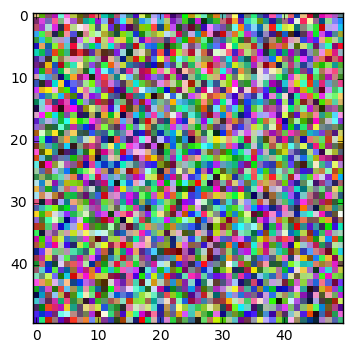

In [288]:
randim_image = np.random.rand(50,50,3)
plt.imshow(randim_image, interpolation="nearest")

## Set Red to 0 (remove the red color)

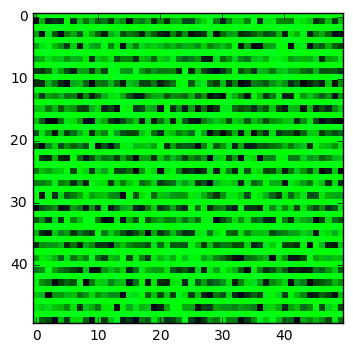

In [284]:
randim_image[:,:,0] = 0
plt.imshow(randim_image, interpolation="nearest")

## Divide Blue by 3 (reduce blue to third)

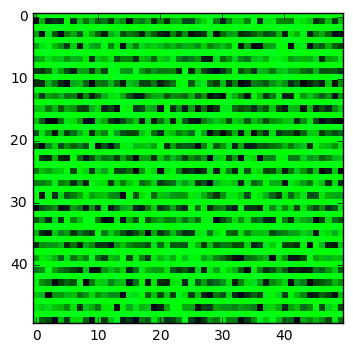

In [283]:
randim_image[:,:,2] /= 3
plt.imshow(randim_image, interpolation="nearest")

## Set green in every other row to 1

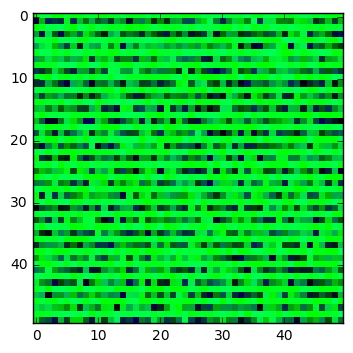

In [281]:
randim_image[::2,:,1] = 1

plt.imshow(randim_image, interpolation="nearest")

# There is more

Numpy is a large library with many useful out of the box functions like:

- [Statistics](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html#order-statistics)
- [Linear algebra](https://docs.scipy.org/doc/numpy/reference/routines.dual.html#linear-algebra)
- [Fast Fourier Transform (FFT) algorithm](https://docs.scipy.org/doc/numpy/reference/routines.fft.html)
- [Financial](https://docs.scipy.org/doc/numpy/reference/routines.financial.html)
- [Business Days](https://docs.scipy.org/doc/numpy/reference/routines.datetime.html#business-day-functions)